# Исследование продаж интернет-магазина компьютерных игр

**Описание проекта** 

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
По прошлогодним данным необходимо сделать прогноз продаж на следующий год.
В наборе данных присутствует аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

*Описание данных*
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

  
**Цель исследования**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**
- Подготовка данных: загрузка и изучение общей информации из предоставленного датасета
- Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- Расширение набора данных, объединение таблиц, добавление столбца с суммарными продажами.
- Исследовательский анализ данных: изучение основных параметров объектов, их распределения, зависимостей, а также выявление и обработка аномалий.
- Формирование гипотез для сравнения метрик: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Общий вывод**

С помощью данного иследования мы постараемся выявить интересные и полезные зависимости для бизнеса, дать рекомендации для улучшения сервиса магазина и увеличения продаж компании.

### Общая информация о данных и предобработка

Импортируем необходимые библиотеки. Далее выведем общую информацию о датасете, посмотрим первые пять строк для понимания структуры данных.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as msno 

In [3]:
pd.set_option('display.max_columns', None)

#### Загрузка данных

In [4]:
df = pd.read_csv('/datasets/games.csv')

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о данных.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


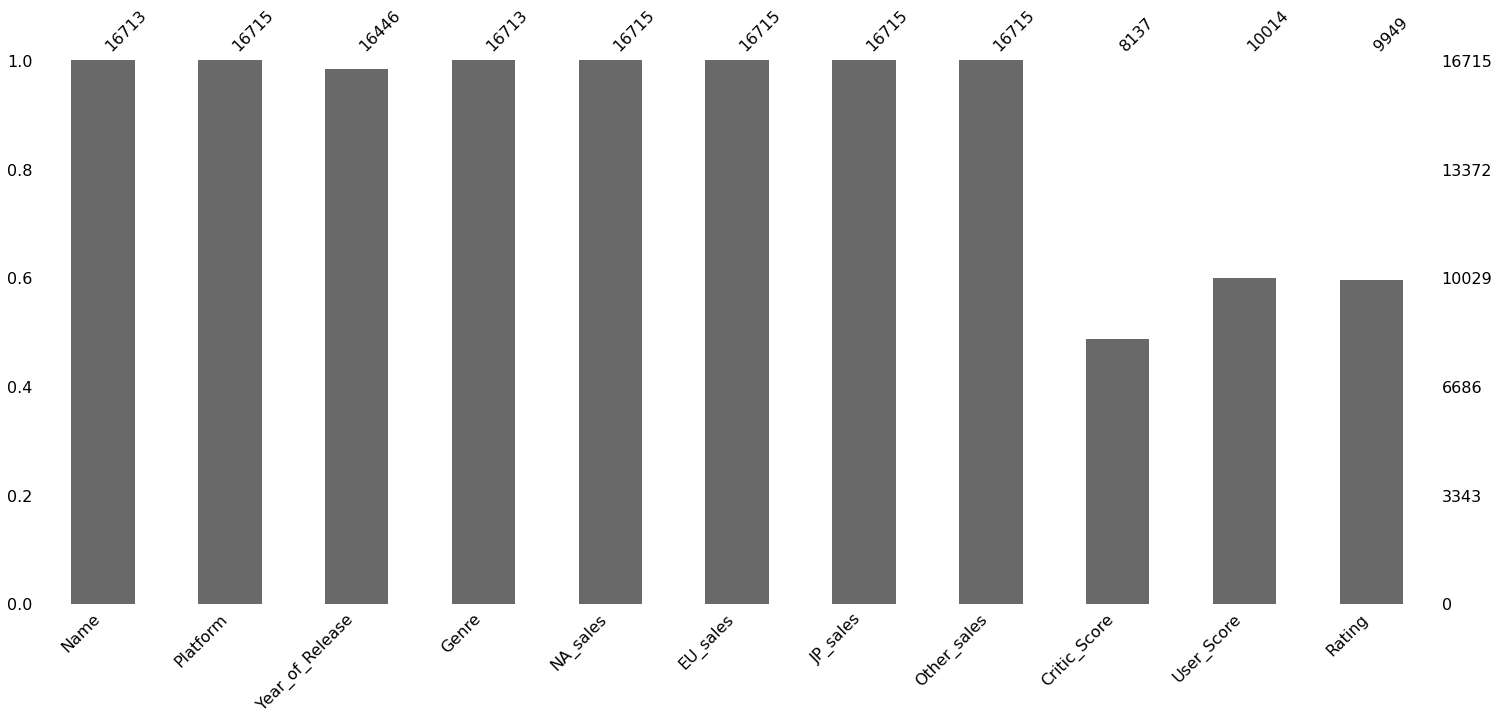

In [7]:
#визулизируем пропуски
msno.bar(df);

Всего в данных 16715 строк и 10 столбцов. В данных присутствуют пропуски, которые мы исследуем далее. Некоторые типы данных требуют замены, например, тип столбца год выпуска - вещественное число. 

#### Подготовка данных

Приведем названия столбцов к общепринятому виду (удалим пропуски, если есть, приведем буквы в нижнему регистру).

In [8]:
df.columns=[col.lower().replace(' ', '_') for col in df]

Проверим названия столбцов.

In [9]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменим тип данных в столбцах - год выпуска с float на дату, рейтинг от пользователей с object на float.
Данные преобразования мы делаем для правильного подсчета агрегированных метрик и для более понятной и опрятной визуализации по годам. 
В столбце год выпуска игры имеется 269 пропусков, что является 1,61% от данных. Удалить такое большое количество данных, учитывая факт, что данные могут быть платными, будет неразумно. Но с другой стороны, год выпуска для нас принципиально важен, так как мы будем делать прогноз будущих продаж, изучая закономерности по прошлым годам. В нашем случае есть три варианта развития событий: 
- заменить пропущенные значения на слово 'None' и сохранить эти данные;
- сделать отдельный датасет, куда поместить данные с пропущенными значениями по году выпуска, чтобы не потерять данные;
- вручную поискать в интернете год выпуска каждой игры, что будет очень трудозатратно.


Для нашего проекта принимаем решение отбросить эти данные. Далее приведем данные к типу int, чтобы отображать год (не приводим к типу дата, так как год отобразится некорректно).
Рейтинг поменяем на float, посколько такая замена возможна при пропусках в данных. Nan по умолчанию считается типом float. Но перед преобразованием посмотрим уникальные значения в этом столбце.

In [10]:
#отбросим строки с пропусками по столбцу год выпуска
df = df.dropna(subset=['year_of_release'])

In [11]:
#приведем данные в столбце год выпуска к типу int
df['year_of_release'] = df['year_of_release'].astype(int)

In [12]:
#проверим уникальные значения в солбце рейтинг от пользователя
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что в списке уникальных значений есть значение tbd, что означает (To Be Determined), в переводе с английского означает «еще предстоит определить». Это рейтинг, который указывает на то, что игра еще находится в разработке или не получила достаточного количества оценок от игроков и критиков для определения ее окончательной оценки.
Оценка Tbd предоставляет игрокам информацию о том, что игра может быть перспективной, но пока не имеет оценки, которая подтверждает или опровергает это предположение. Игрокам часто интересны такие проекты, потому что они могут предложить что-то новое и оригинальное, но они также несут риск получить неудачный продукт.

Посмотрим сколько строк с таким значением рейтинга.

In [13]:
len(df[df['user_score'] == 'tbd'])

2376

Всего таких данных 2376 строк. Поскольку рейтинг еще предстоит определить, то заменим tbd на пустое значение.

In [14]:
df['user_score'] = df['user_score'].replace(r'tbd', np.nan, regex=True)

In [15]:
#изменим тип данных в столбце user_score
df['user_score'] = df['user_score'].astype(float)

В столбце название игры есть два пропуска. Поскольку это всего две строки и данные об имени нам важны, ведь нас интересуют рейтингы именно определенных игр, то мы эти две строки отбросим. Предварительно выведим их, чтобы посмотреть данные. Возможно в этих же строках будут присутствовать два пропуска из столбца жанр игры.

In [16]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Отфильтровав эти строки, видим, что наши предположения оправдались. Пропуски присутствуют не только по столбцу имя, жанр, но и по столбцам рейтингов. Поэтому эти строки отбрасываем.

In [17]:
df = df.dropna(subset=['name'])

Ранее в визуализации пропусков мы видели, что больше всего пропусков в рейтингах игр. Можно попытаться эти данные заполнить средними рейтингами по срезам название игры. Но поскольку мы не можем экспертно присвоить рейтинг той или иной игре, то даже имея исторические данные, мы не можем гарантировать, что какая-то игра не изменит свой рейтинг через год-два. Вкусы игроков меняются с течением времени и в зависимости от поколения. Поэтому такая замена пропущенных значений не будет корректной. Данные пропуски мы оставляем. 

Что касается рейтинга ESRB,  пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. 

Проверим дубликаты.

In [18]:
df.duplicated().sum()

0

Проверим неявные дубликаты.

In [19]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видим, что неявные дубликаты присутствуют. Разница лишь в данных по проданным копиям. Принимаем решение две строки объединить в одну и просуммировать данные по продажам.

In [20]:
df.loc[604, 'eu_sales'] = 0.22 + 0.01

In [21]:
#проверим все ли корректно просуммировалось
df.loc[604]

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
Name: 604, dtype: object

In [22]:
#отбросим строку с индексом 16230
df.drop(16230, inplace=True)

In [23]:
#проверим еще раз неявные дубликаты
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


После обработки пропусков еще раз построим визуализацию пропусков.

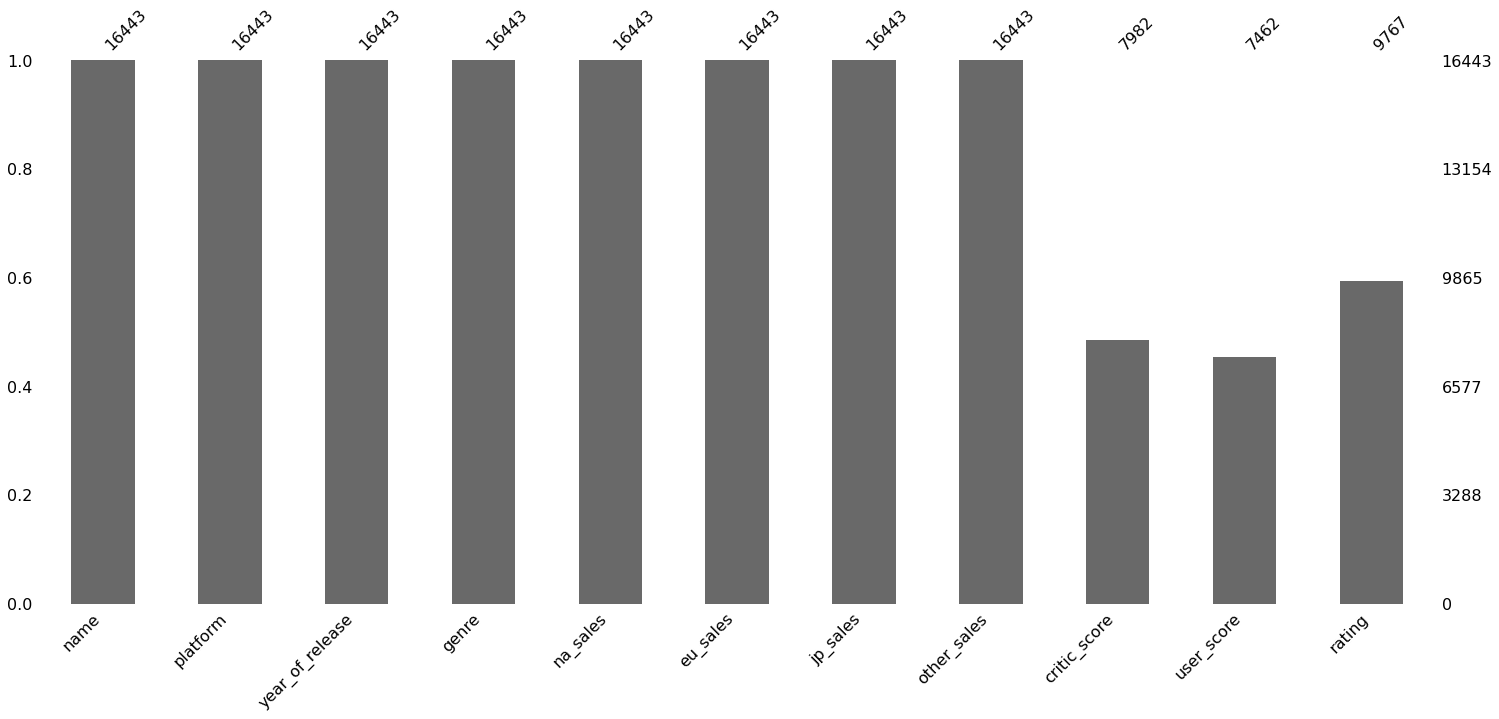

In [24]:
msno.bar(df);

Расширим данные, добавив столбец с общими продажами.

In [25]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Промежуточный вывод после подготовки данных

После загрузки данных и вывода общей информации с визуализацией пропусков, было выявлено, что в данных присутствуют пропуски. Было принято решение удалить две строки с отсутствующим названием игры, поскольку название игры играет ключевую роль в продажах. Мы должны понимать о каком продукте идет речь. При фильтрации данных с отсутствующим названием игры, было выявлено, что в этих же строках есть два отсутствующих значения жанра игры. Поэтому при удалении этих строк мы избавились от пропусков сразу по двум столбцам (название игры и жанр игры). 

Пропуски в годе выпуска было решено отбросить. К сожалению, таких данных 1,6%. Но год выпуска также играет решающую роль для нашего проекта, поскольку мы попытаемся спрогнозировать будущие продажи, имея исторические данные. Без знания года выпуска игры анализ закономерностей не представляется возможным. Как альтернатива можно было бы вручную найти год выпуска каждой игры, но это очень дорогая и трудозатратная процедура. После того, как пропуски были удалены, год выпуска привели в типу int, чтобы в визуализациях не фигурировала плавающая точка. 

Больше всего пропусков в столбцах critic_score, user_score, rating. Это может быть связано либо с неправильной выгрузкой данных, либо некорректным соединением таблиц. Либо пока просто не собраны данные о рейтингах. Это следует дополнительно изучить. 

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы

Изучим, сколько игр выпускалось в разные годы.

In [27]:
df.groupby('year_of_release').agg({'name':['count']})

,name
,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


При группировке и агрегации видим, что в данных присутствует большой разброс годов. Возьмем данные за последние пять лет, чтобы оценить динамику в текущем историческом периоде.

In [28]:
df.groupby('year_of_release').agg({'name':['count']})[-6:-1]

,name
,count
year_of_release,
2011,1136
2012,652
2013,544
2014,581
2015,606


Построим визуализации, чтобы изучить общую тенденцию во времени.

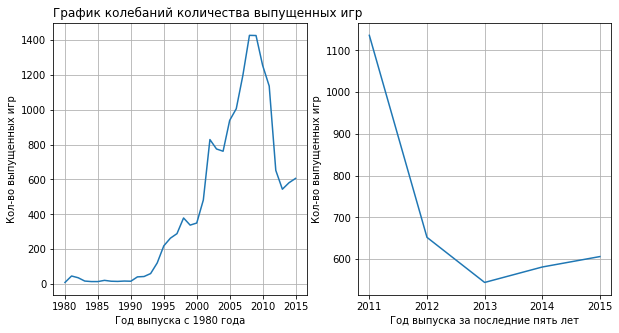

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121) 
plt.plot(df.groupby('year_of_release').agg({'name':['count']})[:-1])
plt.xlabel('Год выпуска с 1980 года')
plt.ylabel('Кол-во выпущенных игр')
plt.grid()

plt.title('График колебаний количества выпущенных игр', loc = 'left')

plt.subplot(122) 
plt.plot(df.groupby('year_of_release').agg({'name':['count']})[-6:-1])
plt.xlabel('Год выпуска за последние пять лет')
plt.ylabel('Кол-во выпущенных игр')
plt.grid()


plt.show()

В целом видим, что количество выпущенных игр показывало значительный рост с 1980 по 2007 год, а затем пошел большой спад. Возможно это как-то связано с глобальным кризисом 2008 года. Но скорее всего до 2008 года был бум на игры, посколько у пользователей появлялись возможности приобретать ПК, и набирала обороты глобальная цифровизация. Кроме того популярность каких-то игр меняется от поколения к поколению.
Для нашего исследования выберем период с 2008 года, когда изменилась общая тенденция по количеству выпущенных игр, кроме того по графикам наблюдаем тенденцию на повышение количества выпущенных игр после 2013 года. 

#### Продажи по платформам

Изучим продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Попробуем понять за какой характерный срок появляются новые и исчезают старые платформы.

Выполним группировку по платформам и посчитаем общие продажи, а затем построим визуализации продаж по годам для топ десять платформ. Но перед группировкой построим распределение продаж, чтобы посмотреть их типы.

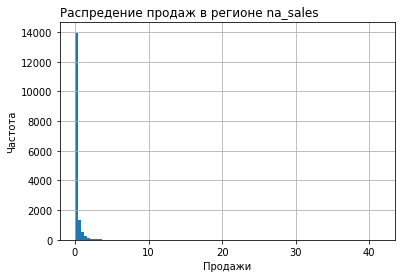

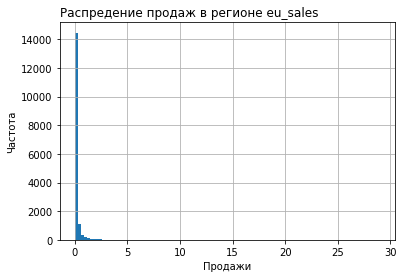

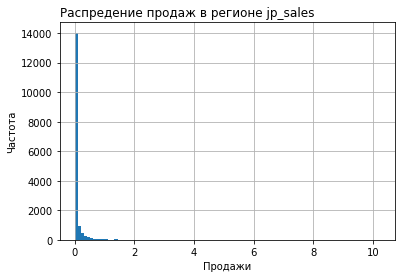

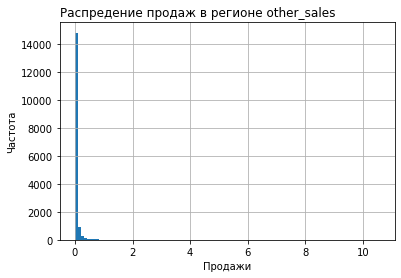

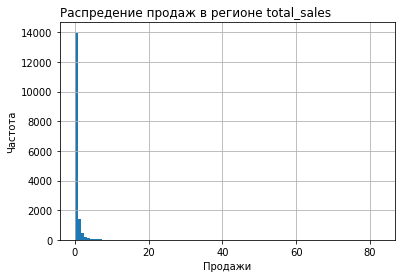

In [30]:
# гистрограмма распределения продаж 
for sale in ['na_sales', 'eu_sales','jp_sales', 'other_sales', 'total_sales']:
    plt.hist(df[sale], bins=100)
    plt.grid(True) 
    plt.title(f'Распредение продаж в регионе {sale}', loc = 'left') 
    plt.xlabel('Продажи') 
    plt.ylabel('Частота') 
    plt.show()

In [31]:
df[['na_sales', 'eu_sales','jp_sales', 'other_sales', 'total_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597,0.536056
std,0.818400,0.506731,0.311109,0.188011,1.558829
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.540000


Из графиков и при вызове метода describe видим, что все графики скошены вправо. Это может говорить о том, что в продажах были какие-то краткосрочные пики продаж (правые хвосты). Например, в начале на волне раскрутки игры, либо в другом периоде, когда продажи вышли на пик. Но в целом во всех регионах в 75% случаев продажи не превысили 0,47 млн проданных копий. 

In [32]:
#общие продажи по всем платформам с 1980 года
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Создадим список платформ с наиболее высокими продажами. Выберем топ-10

In [33]:
list_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[0:10].index

Для визуализации и в целях аккуратности кода создадим отдельную переменную. Для этого отфильтруем исходный датасет, оставив только платформы из топ-десяти, и отбросив ненужные года, и сделаем сводную таблицу. 

In [34]:
df_query = df.query('platform in @list_platform').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index() 
df_query.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


Построим визуализации продаж по годам для топ-десяти платформ по продажам.

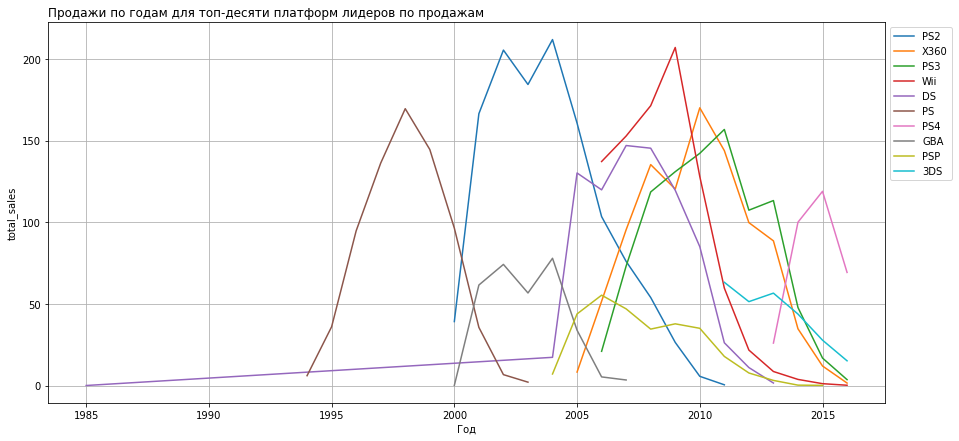

In [35]:
fig, ax = plt.subplots(figsize=(15, 7)) 

# line plot продаж по годам для топ-десяти платформ
for platform in list_platform:
    sns.lineplot(x=df_query[df_query['platform'] == platform]['year_of_release'], y=df_query[df_query['platform'] == platform]['total_sales'], label = platform)
    
plt.grid(True) # сетка
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) # положение легенды
plt.title('Продажи по годам для топ-десяти платформ лидеров по продажам', loc = 'left') # название графика
plt.xlabel('Год') # подпись оси x
plt.show()

Видим на визуализации, что у платформы DS были какие-то продажи в 1985 году, а затем новые только через 20 лет. Скорее всего это ошибка в данных. Поэтому отбросим данные с годом 1985 год и заново построим визуализацию.

In [36]:
df_query = df.query('platform in @list_platform and year_of_release != 1985').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index() 

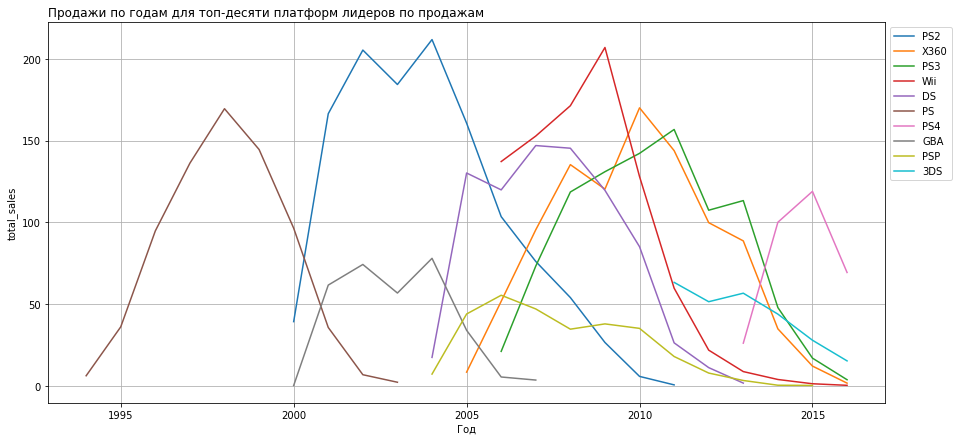

In [37]:
fig, ax = plt.subplots(figsize=(15, 7)) 

# line plot продаж по годам для топ-десяти платформ
for platform in list_platform:
    sns.lineplot(x=df_query[df_query['platform'] == platform]['year_of_release'], y=df_query[df_query['platform'] == platform]['total_sales'], label = platform)
    
plt.grid(True) # сетка
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) # положение легенды
plt.title('Продажи по годам для топ-десяти платформ лидеров по продажам', loc = 'left') # название графика
plt.xlabel('Год') # подпись оси x
plt.show()

Из графиков можно сделать вывод, что первые два-три года у каждой платформы из топ-десяти идет рост продаж, а затем идет спад, причем довольно резкий. Также видим, что некоторые платформы из топ-десяти более уже не существуют.

С помощью сводной таблицы посчитаем сколько лет просуществовала каждая платформа. Для этого посчитаем уникальные значения годов.

In [38]:
df.pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: len(x.unique())).sort_values(by='year_of_release')

,year_of_release
platform,
GG,1
PCFX,1
TG16,1
3DO,2
SCD,2
WS,3
NG,4
PS4,4
XOne,4


Построим распределение сроков существования платформ и вызовем метод describe

In [39]:
df.pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: len(x.unique())).describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


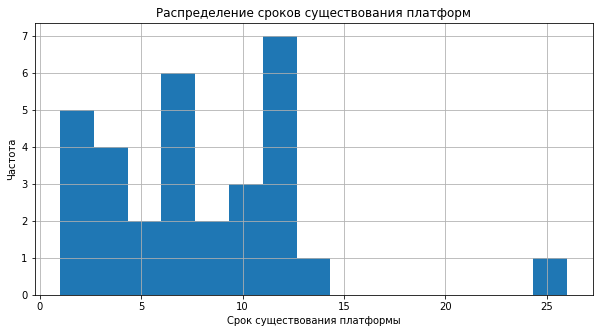

In [40]:
plt.figure(figsize=(10,5))
plt.hist(df.pivot_table(index='platform', values='year_of_release', aggfunc=lambda x: len(x.unique())), bins=15)
plt.xlabel('Срок существования платформы')
plt.ylabel('Частота')
plt.title('Распределение сроков существования платформ')
plt.grid()
plt.show()

По гистограмме и при вызове метода describe видим, что в основном платформы существуют 5-7 лет. Но есть и ветераны в 26 лет (платформа PC).

#### Исследовательский анализ по актуальному в целях исследования периоду

Ранее при построении визуализации мы увидели, что количество выпускаемых игр начало резко падать после 2008 года. Мы пришли к выводу, что у каждого поколения игроков свое поведение и в целях более релевантного прогноза продаж следует анализировать продажи за период от 2008 года до 2015 года. С 2008 года поведение игроков изменилось.

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбираем золотую середину 3 года и плюс данный за 2016 год.

Построим сводную таблицу и визуализацию для продаж всех платформ за период 2013-2016 год. Для этого создадим отдельный датафрейм и будем с ним далее работать.

In [41]:
df_new = df.query('2013 <= year_of_release <= 2016')

Посчитаем суммарные продажи по всем платформам по годам и построим визуализацию. Для аккуратности и читаемости кода создадим новую переменную df_new_group

In [42]:
df_new_group = df_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False).reset_index()
df_new_group.head()

,platform,year_of_release,total_sales
0,PS4,2015,118.90
1,PS3,2013,113.25
2,PS4,2014,100.00
3,X360,2013,88.58
4,PS4,2016,69.25


In [43]:
#создадим список платформ для аккуратности и читаемости кода
list_platform_new = df_new['platform'].unique()

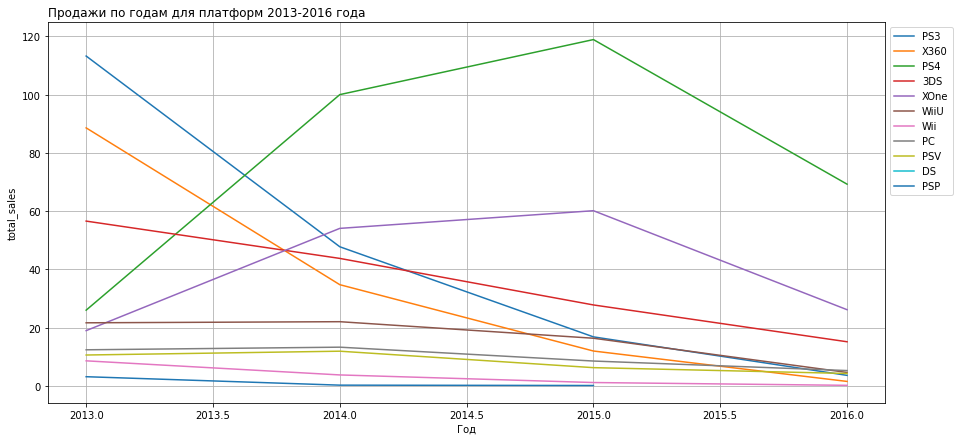

In [44]:
fig, ax = plt.subplots(figsize=(15, 7)) 

# line plot продаж по годам 
for platform in list_platform_new:
    sns.lineplot(x=df_new_group[df_new_group['platform'] == platform]['year_of_release'], y=df_new_group[df_new_group['platform'] == platform]['total_sales'], label = platform)
    
plt.grid(True) # сетка
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) # положение легенды
plt.title('Продажи по годам для платформ 2013-2016 года', loc = 'left') # название графика
plt.xlabel('Год') # подпись оси x
plt.show()

In [45]:
#сгруппируем новый датафрейм по платформам и посчитаем суммарные продажи и сопоставим с графиком
df_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

По продажам в целом лидирует платформа PS4, но по графику продаж по годам, мы наблюдаем, что на этой платформе начиная с 2015 года идет спад продаж, но тем не менее эта платформа находится лидерах в 2016 году. 
Вторая лидирующая платформа по продажам в 2016 году - XOne.

Принимая во внимание предыдущую визуализацию по топ-десяти платформам по продажам и сравнивая с текущей, можно сделать вывод, что все платформы в начале своего появления показывают рост продаж, а затем спад. В среднем платформы существуют 5-7 лет. Поэтому стоит обратить внимание на платформы PS4, XOne и возможно 3DS  и попробовать посотрудничать с ними в краткосрочной перспективе. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

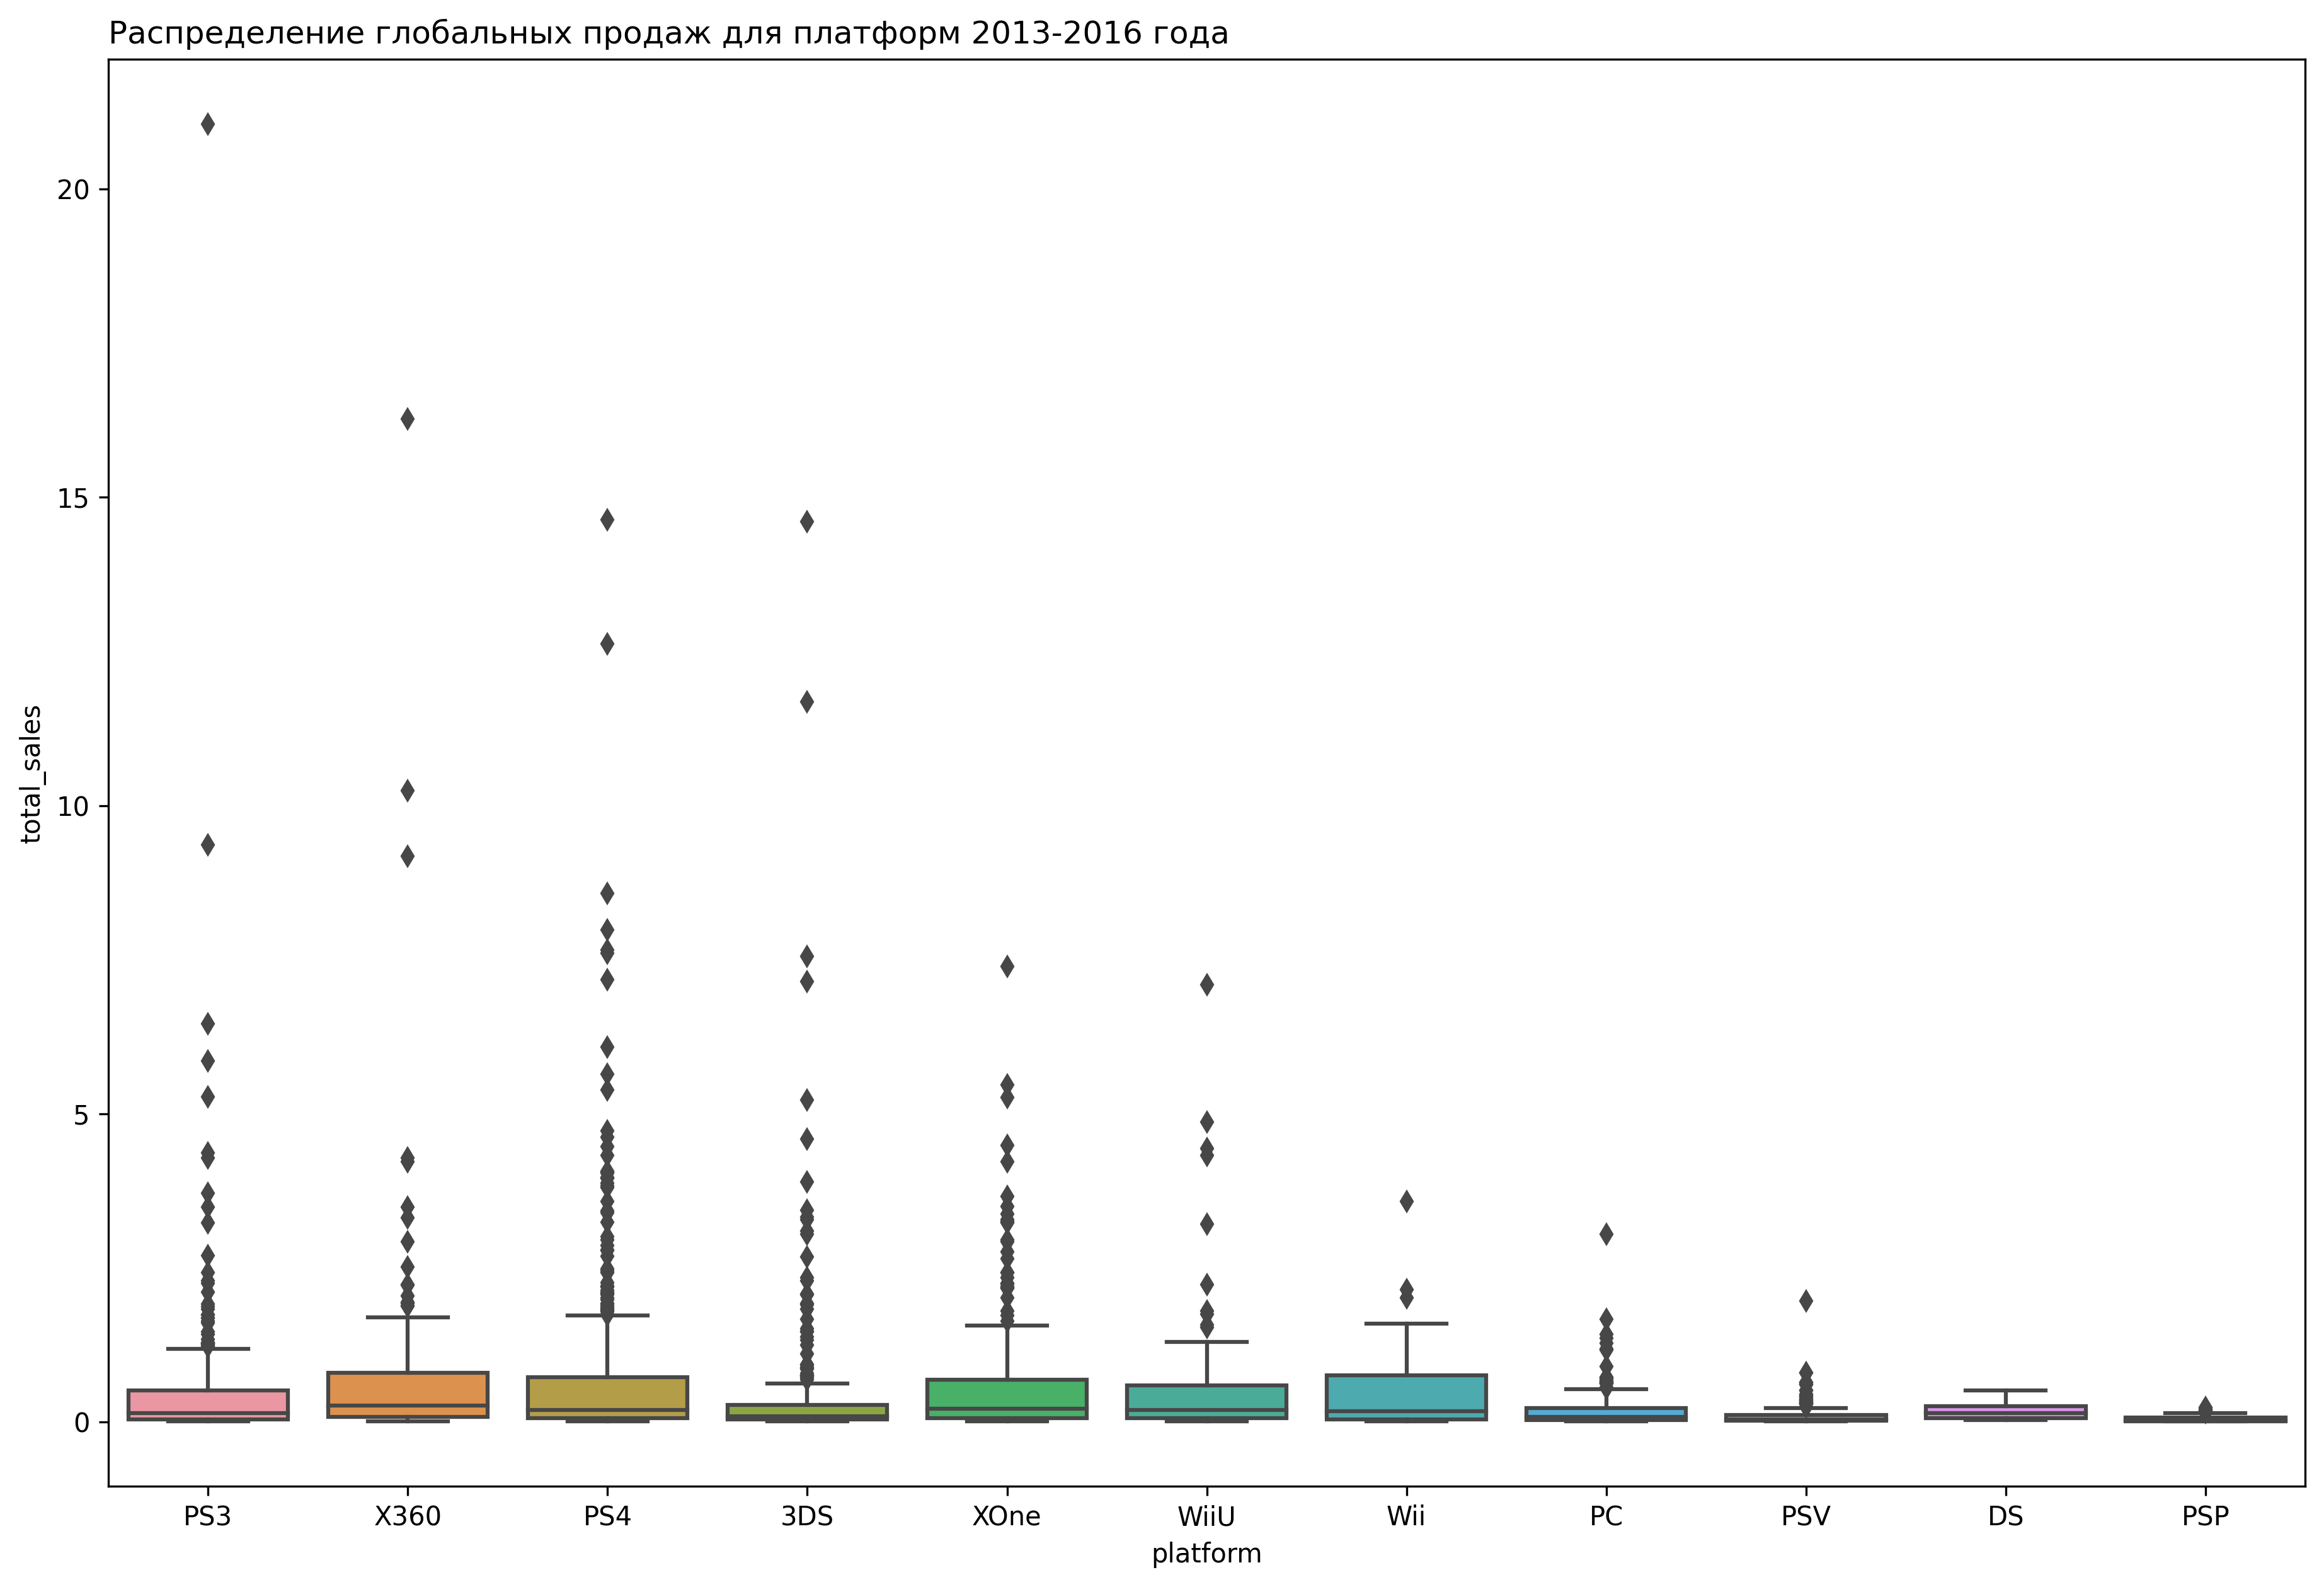

In [46]:
plt.figure(figsize=(15,10),dpi=300)
sns.boxplot(data=df_new, y=df_new['total_sales'], x=df_new['platform'])
plt.title('Распределение глобальных продаж для платформ 2013-2016 года', loc = 'left');

Из визуализаций продаж по годам lineplot, распредения всех продаж в гистограмме и в представленном выше ящике с усами видим, что наше предположение о кратких пиках продаж подтвердилось. Все ящики имеют выбросы, причем в большую сторону. Это как раз взлеты продаж при открытии платформы, а затем идет плавный спад, пока платформа не перестанет существовать. 

Построим еще одну визуализацию, чтобы тщательнее изучить медиану и 75% квантиль.

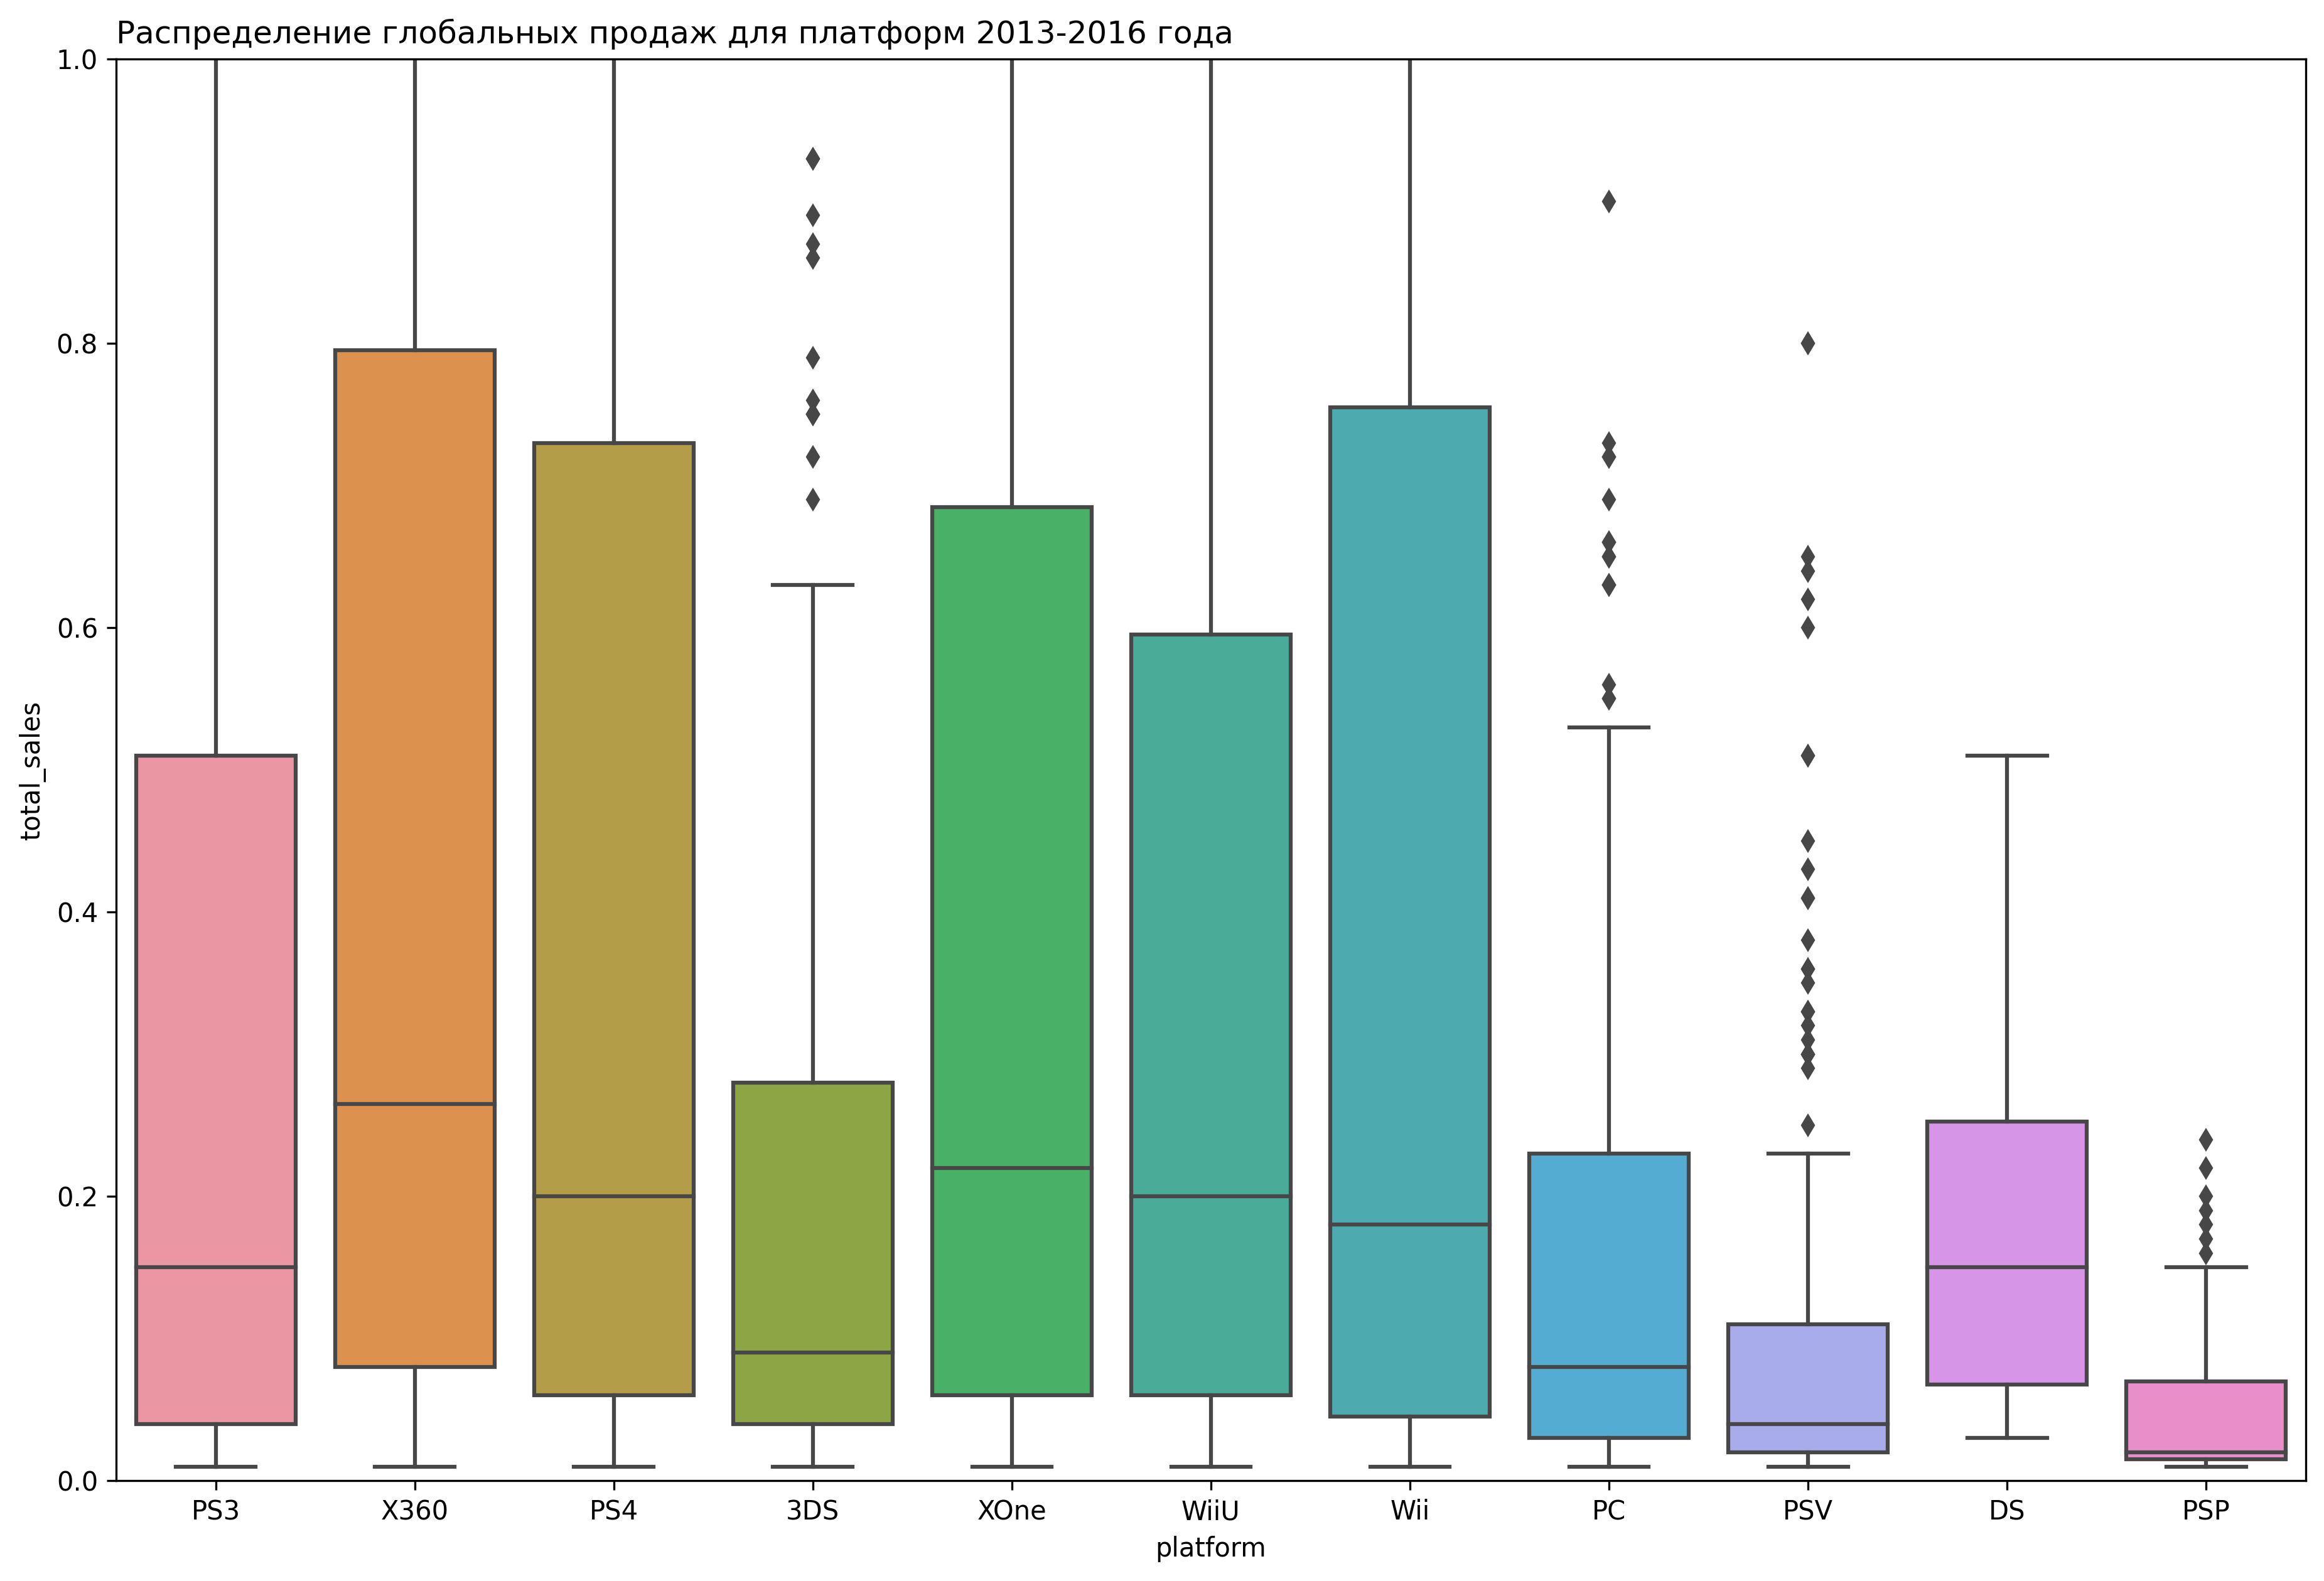

In [47]:
plt.figure(figsize=(15,10),dpi=300)
sns.boxplot(data=df_new, y=df_new['total_sales'], x=df_new['platform'])
plt.ylim(0, 1)
plt.title('Распределение глобальных продаж для платформ 2013-2016 года', loc = 'left');

Из графика можем сделать вывод, что самые высокие глобальные медианные продажи у платформы X360, но на визуализации ранее было видно, в 2016 году платформа по продажам ушла на одно из самых низких мест. Медианные продажи у ранее выбранных перспективных платформ PS4 и XOne пониже, но в целом эти платформы в топ-три лидерах. Значит делаем фокус на эти две платформы. А вот идею о сотрудничестве с 3DS отбрасываем. Медианные продажи этой платформы одни из самых низких.

#### Соотношение продаж и отзывов пользователей

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возьмем платформу с самыми высоки глобальными продажами с 2008 по 2015 год. Как помним, это платформа PS3.

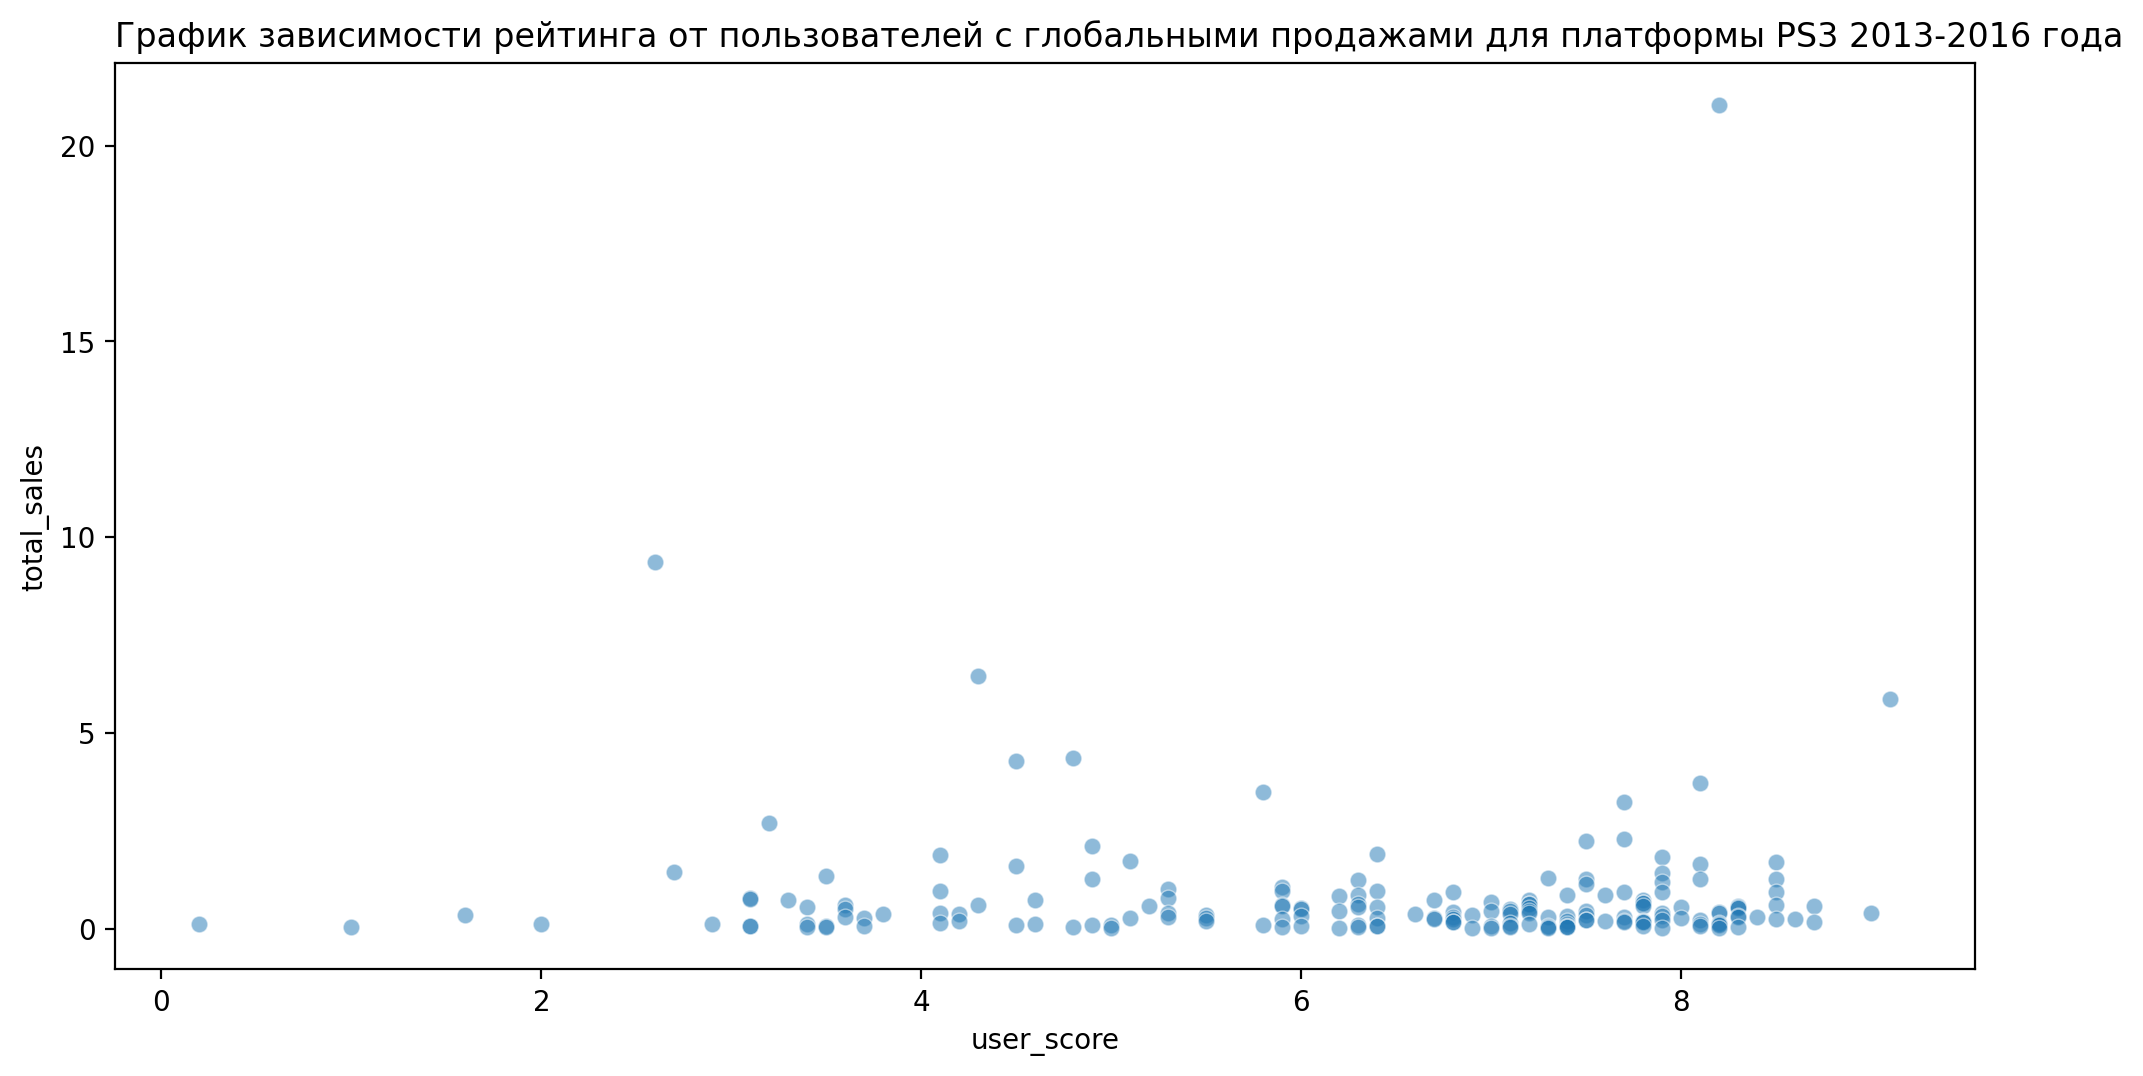

In [48]:
#график рассеяния продаж и рейтинга от пользователей
plt.figure(figsize=(12, 6), dpi=200)
sns.scatterplot(data=df_new, y=df_new[df_new['platform']=='PS3']['total_sales'], x=df_new[df_new['platform']=='PS3']['user_score'], linewidth=0.5,alpha=0.5)
plt.title('График зависимости рейтинга от пользователей с глобальными продажами для платформы PS3 2013-2016 года', loc = 'left');

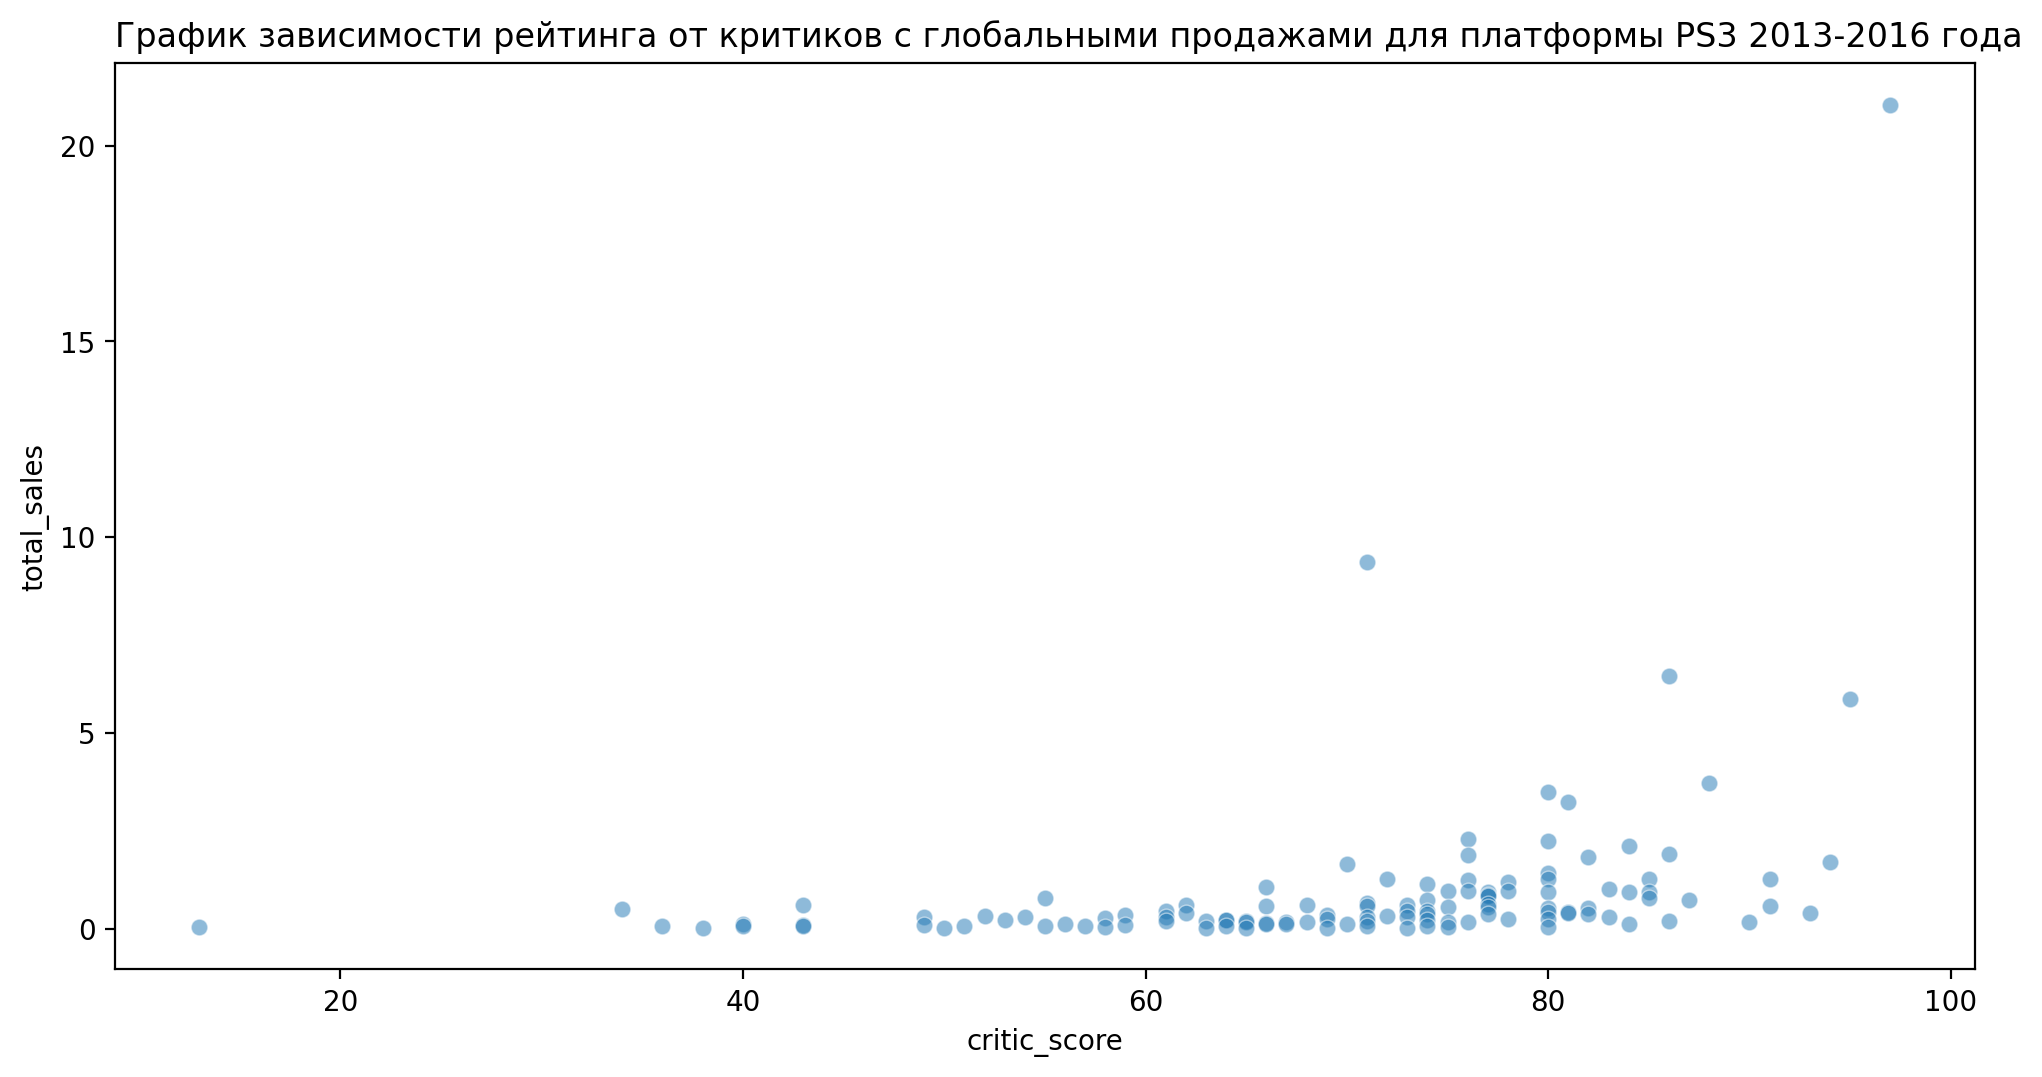

In [49]:
#график рассеяния продаж и рейтинга от критиков
plt.figure(figsize=(12, 6), dpi=200)
sns.scatterplot(data=df_new, y=df_new[df_new['platform']=='PS3']['total_sales'], x=df_new[df_new['platform']=='PS3']['critic_score'], linewidth=0.5,alpha=0.5)
plt.title('График зависимости рейтинга от критиков с глобальными продажами для платформы PS3 2013-2016 года', loc = 'left');

In [50]:
#корреляция для рейтинга пользователей
df_new[df_new['platform']=='PS3']['total_sales'].corr(df_new[df_new['platform']=='PS3']['user_score'])

0.0023944027357566925

In [51]:
#корреляция для рейтинга критиков
df_new[df_new['platform']=='PS3']['total_sales'].corr(df_new[df_new['platform']=='PS3']['critic_score'])

0.3342853393371919

Из графика и при расчете коэффициента корреляции видим, что зависимость между рейтингами от пользователей есть, но она не сильно выражена. При росте рейтинга среди пользователей растут продажи. 

Сильнее зависимость продаж от рейтинга критиков. Поэтому отделу маркетинга стоит обращать на это внимание и работать с критиками.

Посмотрим те же зависимости для всех платформ.

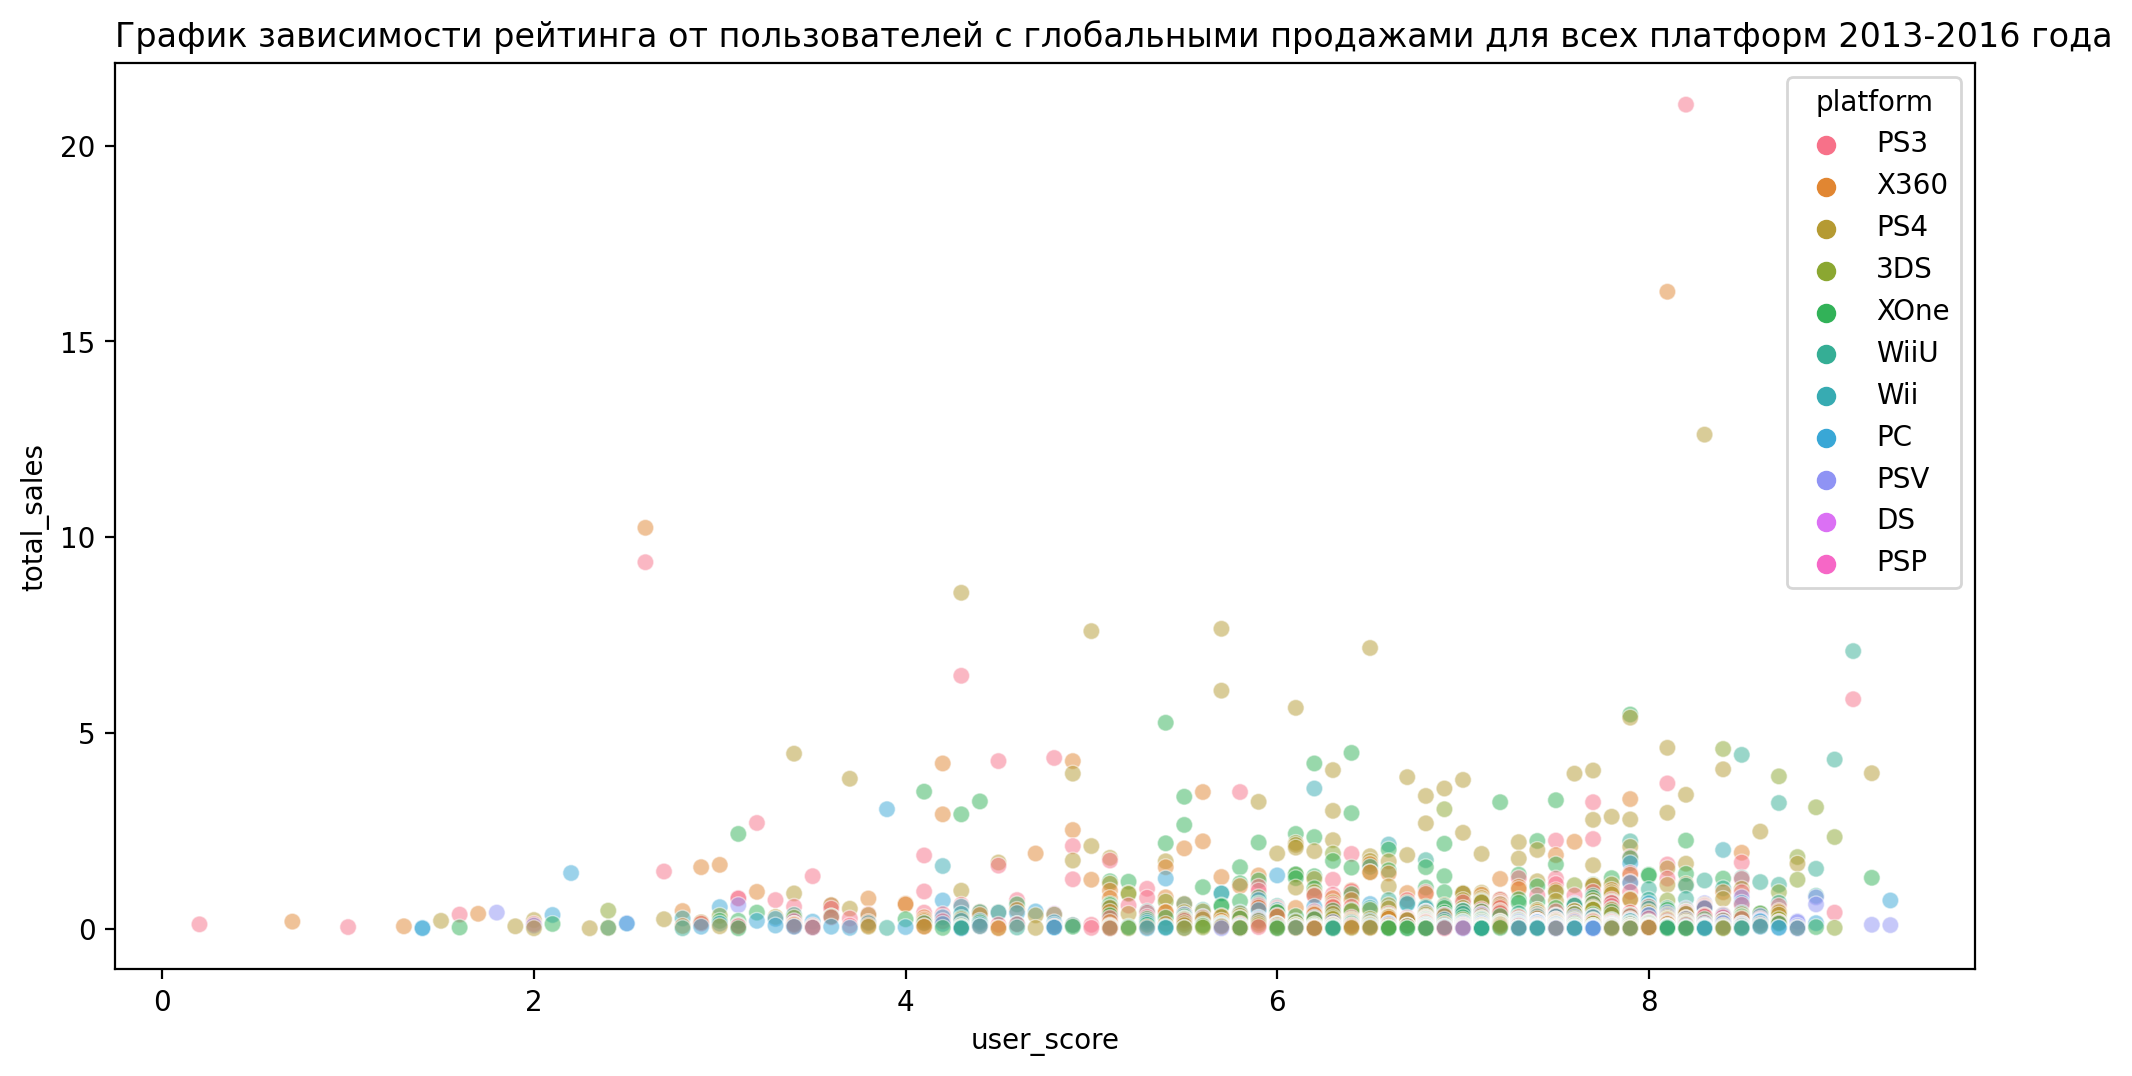

In [52]:
#график рассеяния продаж и рейтинга от пользователей
plt.figure(figsize=(12, 6), dpi=200)
sns.scatterplot(data=df_new, y='total_sales', x='user_score', hue='platform', linewidth=0.5,alpha=0.5)
plt.title('График зависимости рейтинга от пользователей с глобальными продажами для всех платформ 2013-2016 года', loc = 'left');

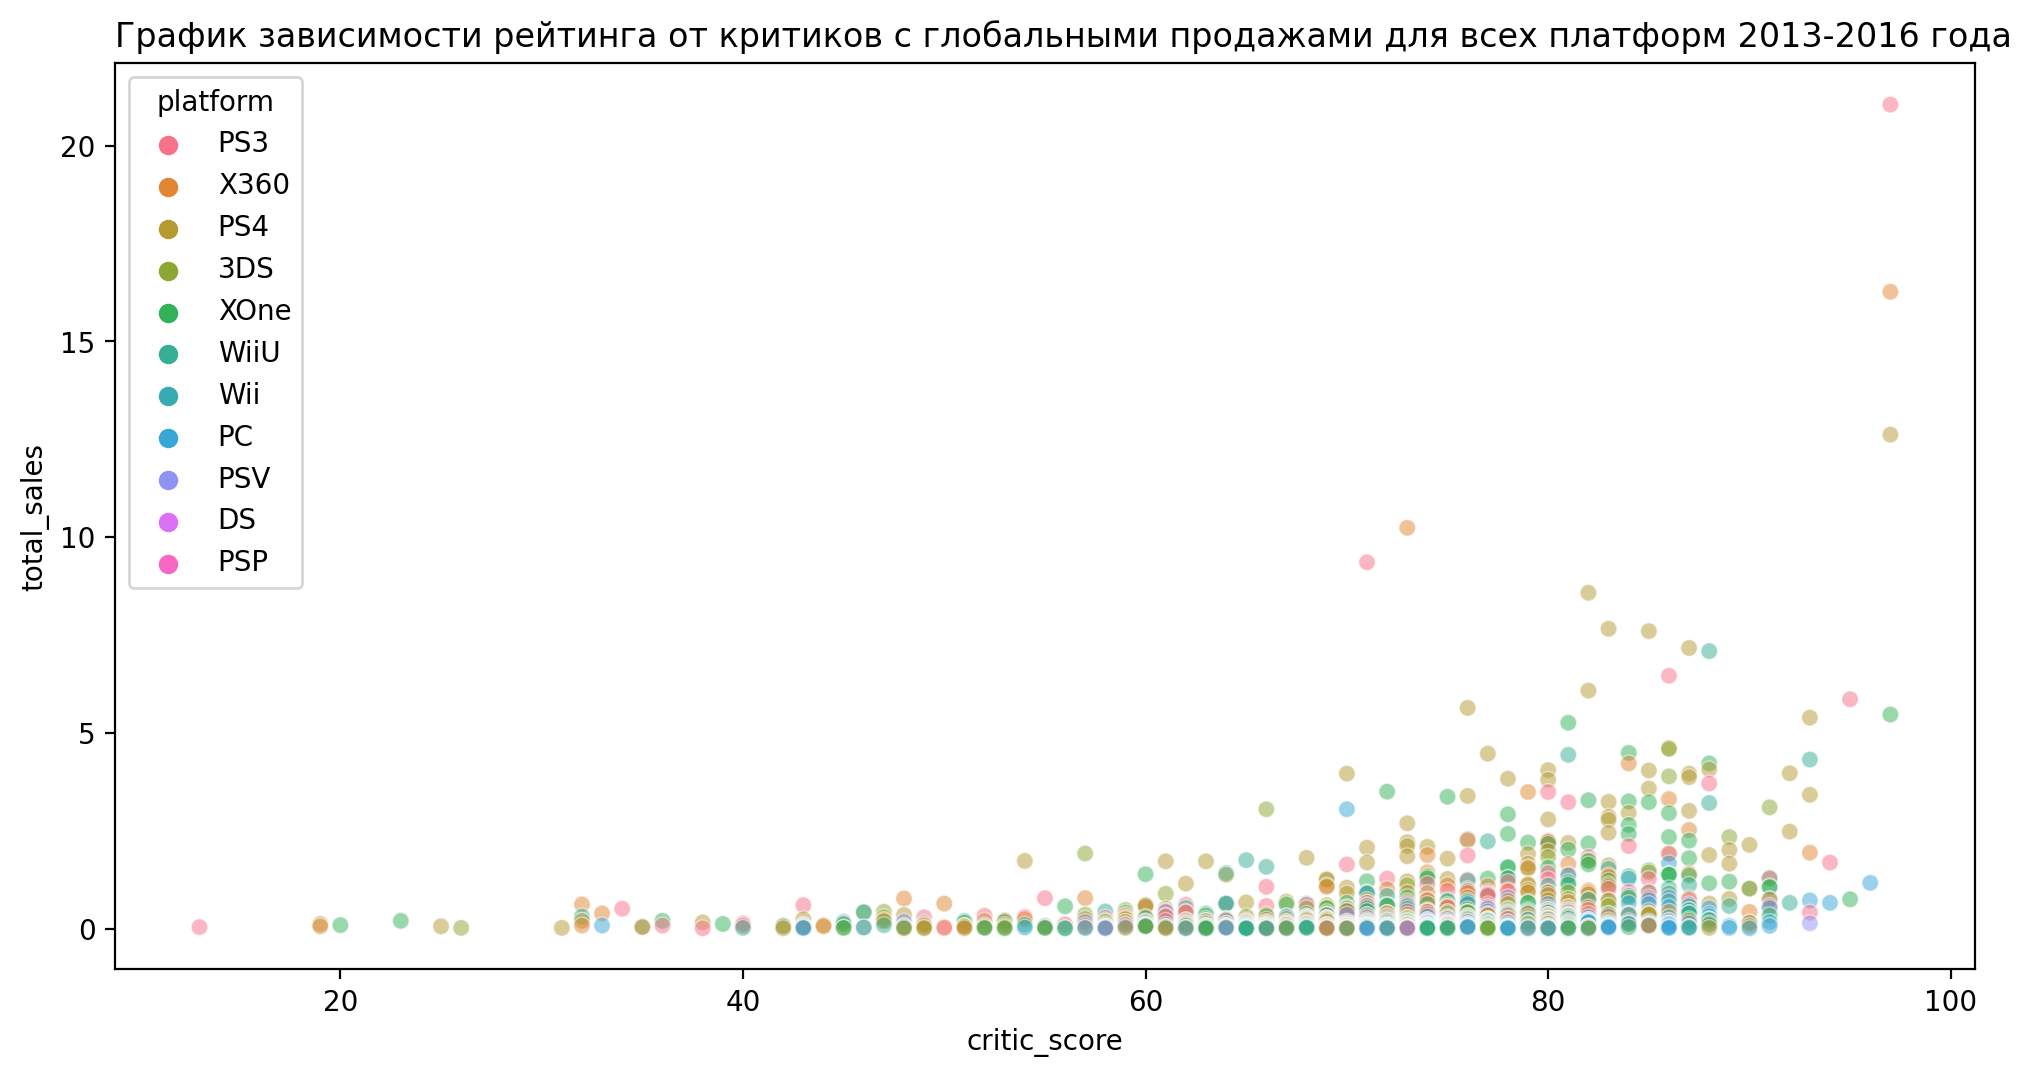

In [53]:
#график рассеяния продаж и рейтинга от критиков
plt.figure(figsize=(12, 6), dpi=200)
sns.scatterplot(data=df_new, y='total_sales', x='critic_score', hue='platform', linewidth=0.5,alpha=0.5)
plt.title('График зависимости рейтинга от критиков с глобальными продажами для всех платформ 2013-2016 года', loc = 'left');

In [54]:
#корреляция для рейтинга пользователей
df_new['total_sales'].corr(df_new['user_score'])

-0.0026078133545982744

In [55]:
#корреляция для рейтинга критиков
df_new['total_sales'].corr(df_new['critic_score'])

0.3136995151027371

Для всех остальных платформ наблюдаем похожую картину, что и для платформы PS. Рейтинги пользователей влияют на рост продаж, но зависимость не сильно выражена. Зато зависимость продаж от рейтинга критиков более ярко выражена.


Возможно, если бы у нас были все данные по рейтингам (а мы помним, что там много пропусков), то картина была бы другая.

#### Распределение игр по жанрам

Что найти жанр, где где игры стабильно приносят высокий доход, рассмотрим средние или медианные продажи. Лучше всего нам это покажет boxplot.
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. 

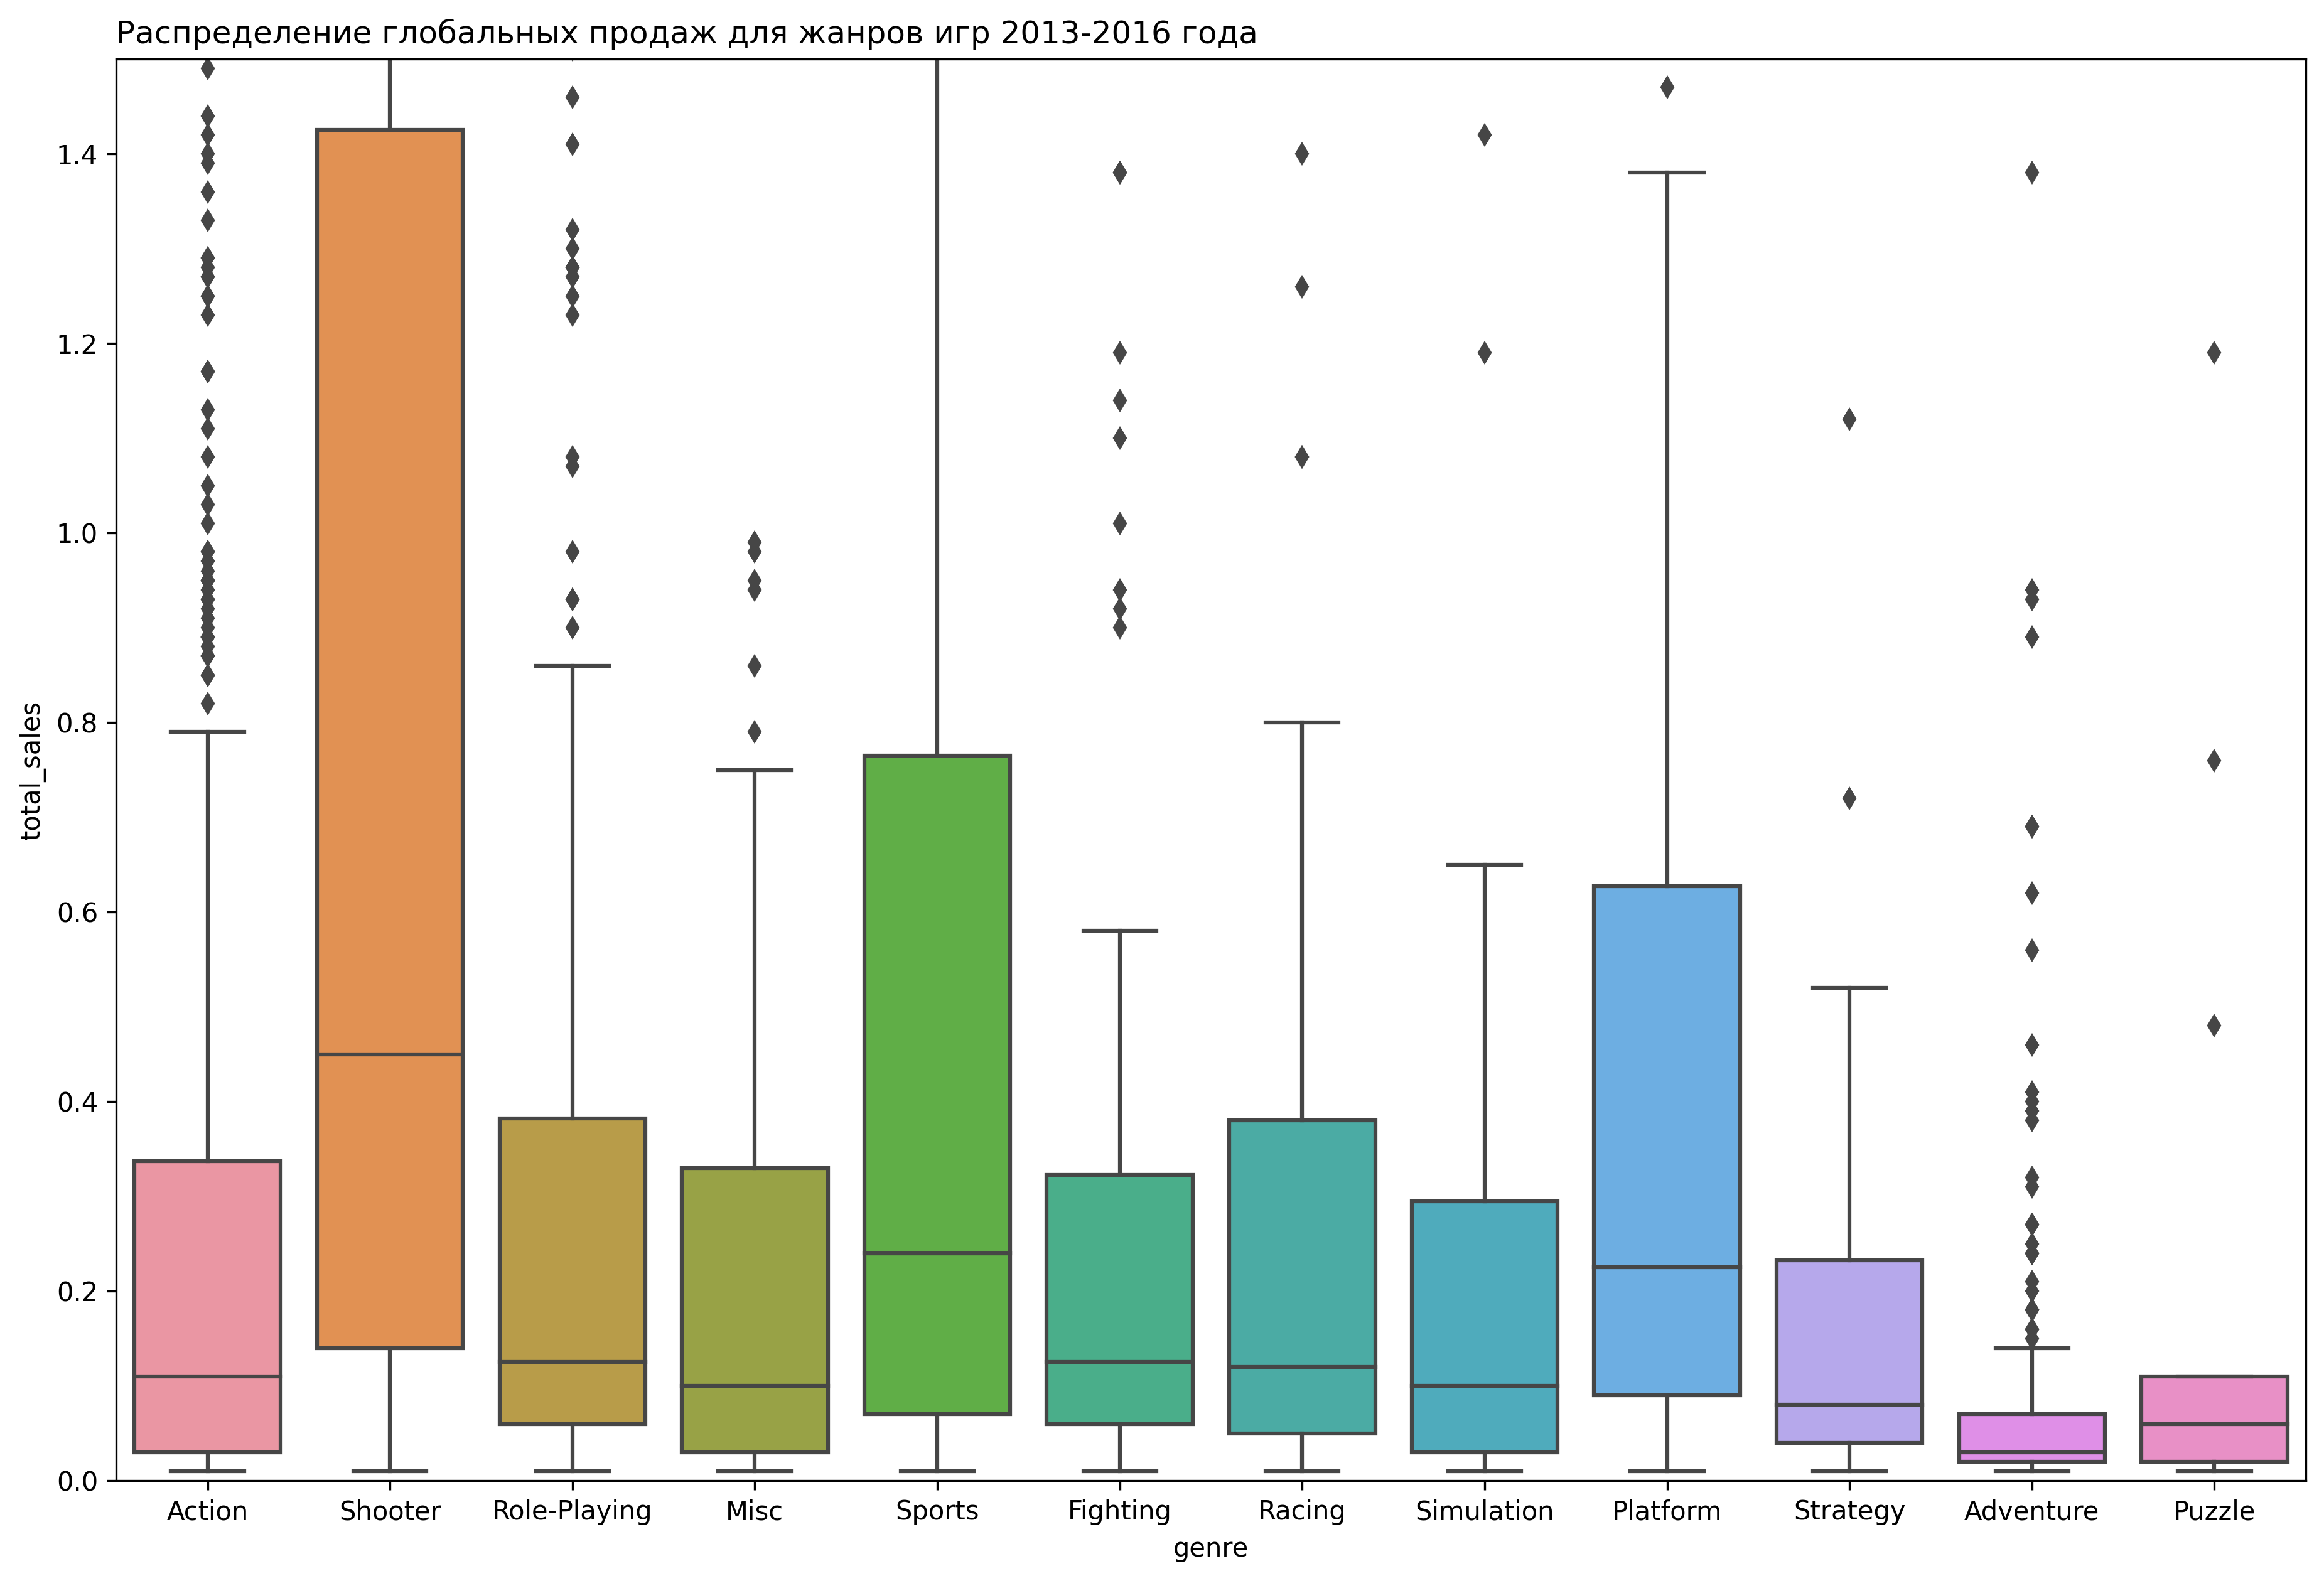

In [56]:
plt.figure(figsize=(15,10),dpi=300)
sns.boxplot(data=df_new, y=df_new['total_sales'], x=df_new['genre'])
plt.ylim(0, 1.5)
plt.title('Распределение глобальных продаж для жанров игр 2013-2016 года', loc = 'left');

Из графика видим, что самые высокие медианные продажи у игр с жанром Shooter. На втором месте по продажам Sports
Самые малоприбыльные жанры это adventure.

#### Промежуточный вывод по результатам исследовательского анализа

Для анализа глобальной тенденции по выпуску игр в год был построен график начиная с 1980 года по 2015 год. График дал повод придти к выводу, что поведение пользователей изменилось после 2008 года. 
Поскольку игровой бизнес является очень динамично меняющимся, то было принято провести анализ за послдение три года плюс захватить 2016 год. Для этого был создан новый датасет для дальнейшего исследования.

Для выявления характеристик платформ была построена визуализация по ежегодным продажам для топ-десяти платформ лидеров продаж за период начиная с 1980 года. Затем была построена такая же визуализация, но для всех платформ за период 2013-2016 года. Было выявлено, что платформы в среднем существуют 5-7 лет. В начале своей жизни они показывают стремительный рост продаж, но после прошествия 2-3 года спад. Для прогноза будущих продаж было выявлено две перспективных платформы, с которыми можно посотрудничать в краткосрочной перспективе. Это платформы -  PS4, XOne. 

Далее изучили зависимость продаж от отзывов пользователей и критиков, с целью работы над этим. Пришли к выводу, что зависимость есть, но она слабо выражена. Но тем не менее корреляция ярче выражена в зависимости от рейтингов критиков. 

Изучили зависимость продаж от жанра игры. Самые продаваемые жанры - это shooter и sports. Самые малопродаваемые жанры - adventure.


### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
 - самые популярные платформы (топ-5). Изучим различия в долях продаж.
 - самые популярные жанры (топ-5). Изучим разницу.
 - влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [57]:
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Напишем функцию для подсчета суммы проданных копий игр по платформам и жанрам игр.

In [58]:
def popular(region):
    print(f'Топ-пять популярных платформ в регионе {region}')
    display(df_new[[region, 'platform']].groupby('platform')[region].sum().sort_values(ascending=False)[:5])
    print(50*'*')
    print(f'Топ-пять популярных жанров в регионе {region}')        
    display(df_new[[region, 'genre']].groupby('genre')[region].sum().sort_values(ascending=False)[:5])
    print(50*'*')
    print(f'Зависимость продаж от рейтинга ESRB {region}') 
    display(df_new[[region, 'rating']].groupby('rating').sum().sort_values(by=region, ascending=False)[:5])

**Северная америка**

In [59]:
popular('na_sales')

Топ-пять популярных платформ в регионе na_sales


platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

**************************************************
Топ-пять популярных жанров в регионе na_sales


genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

**************************************************
Зависимость продаж от рейтинга ESRB na_sales


,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


**Европа**

In [60]:
popular('eu_sales')

Топ-пять популярных платформ в регионе eu_sales


platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

**************************************************
Топ-пять популярных жанров в регионе eu_sales


genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

**************************************************
Зависимость продаж от рейтинга ESRB eu_sales


,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


**Япония**

In [61]:
popular('jp_sales')

Топ-пять популярных платформ в регионе jp_sales


platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

**************************************************
Топ-пять популярных жанров в регионе jp_sales


genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

**************************************************
Зависимость продаж от рейтинга ESRB jp_sales


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


#### Промежуточный вывод по результатам исследования портрета игрока в каждом регионе.

 Основываясь на полученных данных, мы можем сделать вывод, что портрет игрока из Северной Америки практически совпадает с игроком из Европы. В топ-пять жанров входят практически одинаковые жанры, за исключеним, что в Европу в пятерку вошли гонки, а в Америке Misc. Игроки обожают action и shooter. А вот портрет игрока из Японии отличается. На первом месте ролевые игры, но Action все равно на высокой позиции. В целом топовые жанры похожи, но в Японии в топе присутствует Fighting. Также видим, что в топе рейтинги ESRB тоже практически одинаковые. Напрашивается вывод, что при планировании продаж все-таки имеет смысл учитывать региональные культурные особенности и присвоенные рейтинги ESRB. Все три показателя влияют на продажи.
 
Касательно платформ можно сделать вывод, что ранее выбранные нами платформы в целях сорудничества PS4 и XOne входят в топ-пять во всех регионах. Значит делаем фокус на них. 

### Проверка статистических гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC.

Перед тем как выбирать статистический критерий создадим две выборки и посмотрим их распределения. Далее сформулируем нулевую и альтернативную гипотезу.

In [62]:
df_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Выборка для первой группы XOne.

In [63]:
first_group = df_new[df_new['platform']=='XOne']['user_score'].dropna().sample(100)

Выборка для второй группы PС.

In [64]:
second_group = df_new[df_new['platform']=='PC']['user_score'].dropna().sample(100)

Посмотрим описательную статистику для двух выборок и построим гистограммы.

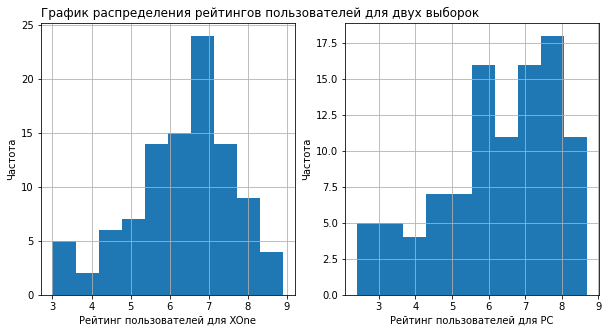

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(121) 
plt.hist(first_group)
plt.xlabel('Рейтинг пользователей для XOne')
plt.ylabel('Частота')
plt.grid()

plt.title('График распределения рейтингов пользователей для двух выборок', loc = 'left')

plt.subplot(122) 
plt.hist(second_group)
plt.xlabel('Рейтинг пользователей для РС')
plt.ylabel('Частота')
plt.grid()


plt.show()

In [66]:
first_group.describe()

count    100.000000
mean       6.346000
std        1.338431
min        3.000000
25%        5.675000
50%        6.600000
75%        7.225000
max        8.900000
Name: user_score, dtype: float64

In [67]:
second_group.describe()

count    100.000000
mean       6.278000
std        1.620424
min        2.400000
25%        5.400000
50%        6.400000
75%        7.600000
max        8.700000
Name: user_score, dtype: float64

Из графиков и описательной статистики видим, что распеределения близки к нормальным, но тем не менее скошены. Средние у них близки по значениям, стандартное отклонение немного различается.
Выберем в качестве критерия - t-тест.

*Нулевая гипотеза:*

средние значения рейтинга от пользователей из двух групп равны.

*Альтернативная гипотеза:*

средние значения рейтинга от пользователей из двух групп не равны.


Для проверки гипотез используем t-тест, так как соблюдаются условия для теста:

- генеральные совокупности не зависят друг от друга
- выборочные средние распределены практически нормально, но наши выборки достаточно большие, чтобы применить т-тест.
- мы предполагаем, что дисперсии генеральных совокупностей равны. Мы никогда точно не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей. С другой — по умолчанию параметр equal_var принимает значение True: дисперсии считаются равными и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить. При этом если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан. Симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается.)


Уровень значимости выберем 0.05. Это общепринятое значение. 

In [68]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(first_group, second_group, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.7466228354057627
Нет оснований отвергнуть нулевую гипотезу


По итогам теста на основании наших данных и при заданном уровне значимости у нас нет оснований отвергнуть нулевую гипотезу о том, что средние значения рейтинга от пользователей платформ XOne и PC  равны.

#### Средние пользовательские рейтинги жанров Action и Sports.

In [69]:
df_new['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

Выборка для первой группы для жанра Action.

In [70]:
first_group = df_new[df_new['genre']=='Action']['user_score'].dropna().sample(100)

Выборка для первой группы для жанра Sports.

In [71]:
second_group = df_new[df_new['genre']=='Sports']['user_score'].dropna().sample(100)

Посмотрим описательную статистику для двух выборок и построим гистограммы.

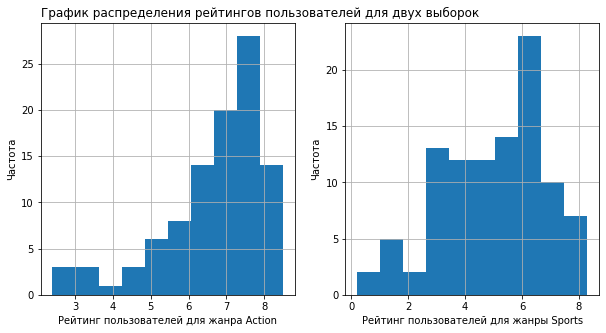

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(121) 
plt.hist(first_group)
plt.xlabel('Рейтинг пользователей для жанра Action')
plt.ylabel('Частота')
plt.grid()

plt.title('График распределения рейтингов пользователей для двух выборок', loc = 'left')

plt.subplot(122) 
plt.hist(second_group)
plt.xlabel('Рейтинг пользователей для жанры Sports')
plt.ylabel('Частота')
plt.grid()


plt.show()

In [73]:
first_group.describe()

count    100.000000
mean       6.677000
std        1.356827
min        2.400000
25%        6.200000
50%        7.100000
75%        7.600000
max        8.500000
Name: user_score, dtype: float64

In [74]:
second_group.describe()

count    100.000000
mean       4.979000
std        1.800914
min        0.200000
25%        3.800000
50%        5.450000
75%        6.225000
max        8.300000
Name: user_score, dtype: float64

Из графиков и описательной статистики видим, что распеределения не являются нормальными. Средние различаются, стандартное отклонение немного различается.
Также и для проверки этой гипотезы выберем в качестве критерия - t-тест, поскольку наши выборки большие по размеру.

*Нулевая гипотеза:*

средние значения рейтинга от пользователей из двух групп равны.

*Альтернативная гипотеза:*

средние значения рейтинга от пользователей из двух групп не равны.


Для проверки гипотез используем t-тест, так как соблюдаются условия для теста:

- генеральные совокупности не зависят друг от друга
- выборочные средние не распределены нормально, но наши выборки достаточно большие, чтобы применить т-тест.
- мы предполагаем, что дисперсии генеральных совокупностей равны. Мы никогда точно не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей. С другой — по умолчанию параметр equal_var принимает значение True: дисперсии считаются равными и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить. При этом если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан. Симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается.)


Уровень значимости выберем 0.05. Это общепринятое значение. 

In [75]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(first_group, second_group, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.7521335284643505e-12
Отвергаем нулевую гипотезу


По итогам теста на основании наших данных и при заданном уровне значимости у нас нет оснований отвергнуть альтернативную гипотезу о том, что средние значения рейтинга от пользователей игра жанра Action и Sport разные.

#### Промежуточный вывод по итогам проверки гипотез.

Для исследования поставленных гипотез был проведен двусторонний т-тест, поскольку соблюдались условия для его проведения. По итогам теста при заданном уровне значимости мы не смогли опровергнуть гипотезу о том, что рейтинги на разных платформах отличаются. Но также мы отвергли гипотезу о том, что рейтинги жанра Action и Sports не отличаются. Что было очевидно на всех наших графиках и исследованиях портрета игроков. По всем регионам Action был в топ-два лидерах.

### Общий вывод 

**Описание проекта** 

Проведен анализ данных по продажам игр разных жанров на разных платформах в нескольких регионах для выявления интересных зависимостей и для планирования будущих продаж.

**Ход исследования** 

Перед началом аналитической работы было проведено изучение датасета на наличие дубликатов и пропусков. После загрузки данных и вывода общей информации с визуализацией пропусков, было выявлено, что в данных присутствуют пропуски. Было принято решение удалить две строки с отсутствующим названием игры, поскольку название игры играет ключевую роль в продажах. При фильтрации данных с отсутствующим названием игры, было выявлено, что в этих же строках есть два отсутствующих значения жанра игры. Поэтому при удалении этих строк мы избавились от пропусков сразу по двум столбцам (название игры и жанр игры).

Пропуски в годе выпуска было решено отбросить. К сожалению, таких данных 1,6%. Но год выпуска также играет решающую роль для нашего проекта, поскольку мы попытаемся спрогнозировать будущие продажи, имея исторические данные. После того, как пропуски были удалены, год выпуска привели в типу int, чтобы в визуализациях не фигурировала плавающая точка.

Для анализа глобальной тенденции по выпуску игр в год был построен график начиная с 1980 года по 2015 год. График дал повод придти к выводу, что поведение пользователей изменилось после 2008 года. Но учитывая факт, что игровой бизнес динамично меняется было принято решение анализировать период, начиная с 20138 года. Для этого был создан новый датасет для дальнейшего исследования.

Для выявления характеристик платформ была построена визуализация по ежегодным продажам для топ-десяти платформ лидеров продаж за период начиная с 1980 года. Затем была построена такая же визуализация, но для всех платформ за период 2013-2016 года. Было выявлено, что платформы в среднем существуют 5-7 лет. В начале своей жизни они показывают стремительный рост продаж, но после прошествия 2-3 года спад. Для прогноза будущих продаж было выявлено три перспективных платформы, с которыми можно посотрудничать в краткосрочной перспективе. Это платформы -  PS4, XOne. В 2016 году обе платформы в лидерах по продажам, и их медианные глобальные продажи за весь исследуюемый период в топ-три платформ. 

Далее изучили зависимость продаж от отзывов пользователей и критиков, с целью работы над этим. Пришли к выводу, что зависимость есть, но она слабо выражена. Но тем не менее корреляция ярче выражена в зависимости от рейтингов критиков. 

Изучили зависимость продаж от жанра игры. Самые продаваемые жанры - это shooter и sport. Самые малопродаваемые жанры - adventure.

Попытались составить портрет игрока из разных регионов и пришли к выводу, что поведение игроков в Америке и Европе очень похоже. В топ-пять жанров входят практически одинаковые жанры, за исключеним, что в Европу в пятерку вошли гонки, а в Америке Misc. Игроки обожают action и shooter. А вот портрет игрока из Японии отличается. На первом месте ролевые игры, но Action все равно на высокой позиции. В целом топовые жанры похожи, но в Японии в топе присутствует Fighting. Также видим, что в топе рейтинги ESRB тоже практически одинаковые. Напрашивается вывод, что при планировании продаж все-таки имеет смысл учитывать региональные культурные особенности и присвоенные рейтинги ESRB. Все три показателя влияют на продажи.
 
Касательно платформ можно сделать вывод, что ранее выбранные нами платформы в целях сорудничества PS4 и XOne входят в топ-пять во всех регионах. Значит делаем фокус на них.  
 

**Выявленные аномалии и предположения почему такое могло произойти** 

Больше всего пропусков в столбцах critic_score, user_score, rating. Это может быть связано либо с неправильной выгрузкой данных, либо некорректным соединением таблиц. Либо пока просто не собраны данные о рейтингах. Это следует дополнительно изучить.


**Постановка и проверка гипотез**

Для изучения зависимостей рейтингов для двух разных платформ и двух разных жанров был проведен т-тест. По итогам теста пришли к выводу, что рейтинг пользователей не зависит от платформы, но зависит от жанра игры.